In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('MNRAS')
import os, sys

In [2]:
from hod.utils.get_para_abacus_summit import get_hod_para, get_cosmo_para
from hod.pipeline.plot_lensing import PlotLensing
from hod.pipeline.plot_counts_richness import PlotCountsRichness

#from hod.y1.plot_counts_richness_y1 import plot_counts_richness_y1
#from hod.y1.plot_lensing_y1 import plot_lensing_y1

In [3]:
loc  = '/projects/hywu/cluster_sims/cluster_finding/data/emulator_data/'

cosmo_id = 0
nbins = 4
iz = 0
redshift = 0.3
hod_para = get_hod_para(0)
key_list = list(hod_para.keys())[1:]
#print(key_list)
#['alpha', 'lgM1', 'lgkappa', 'lgMcut', 'sigmalogM', 
#'sigmaintr', 'f_miscen', 'tau_miscen', 'depth', 'A', 'B']

key_list2 = [r'$\alpha$', r'$\log M_1$', r'$\log\kappa$', 
             r'$\log M_{\rm min}$', r'$\sigma_{\log M}$', r'$\sigma_{\rm intr}$', 
             r'$f_{\rm miscen}$', r'$\tau_{\rm miscen}$', r'$q_{\rm proj}$']


ipara_list = [3,4,1,2,0,5,6,7,8] #,9,10]

# get the fiducial
hod_id = 0
data_loc = loc + f'base_c{cosmo_id:0>3d}_ph000/z0p300/model_hod{hod_id:0>6d}/obs_q180_bg_miscen_desy1/'

# Fix cosmo, vary HOD. Plot all parameters
# sensitivity of lensing

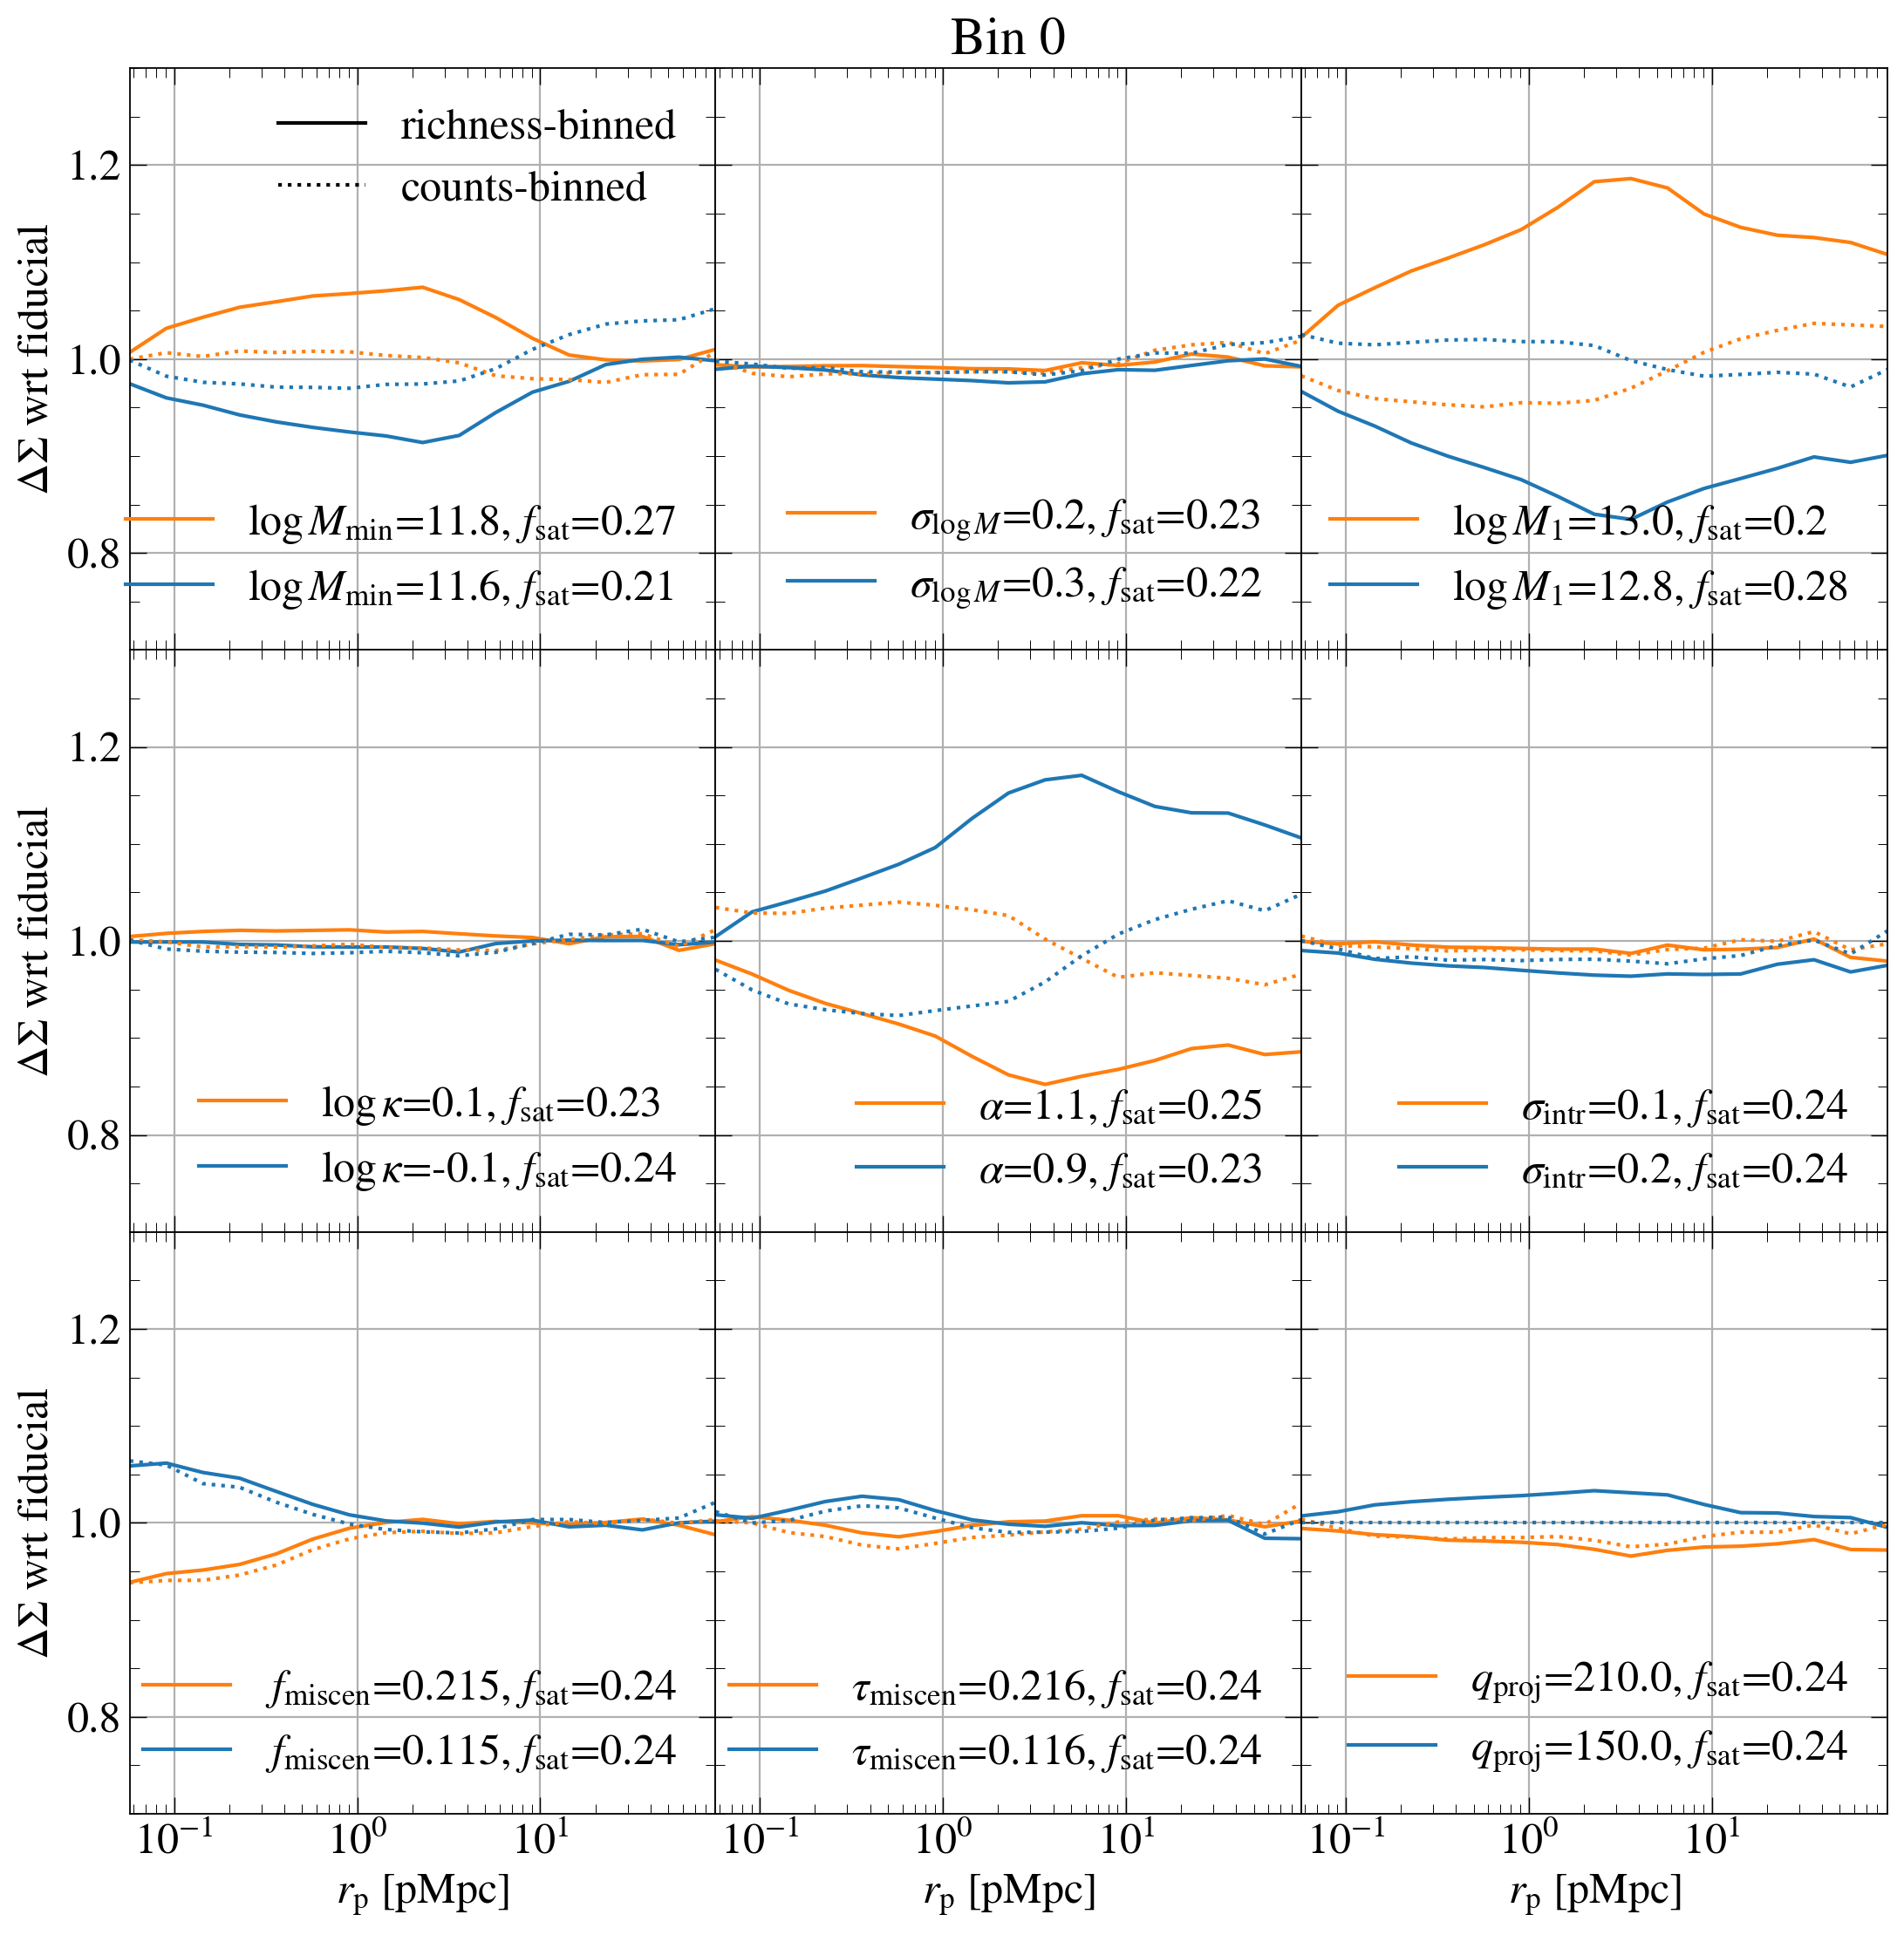

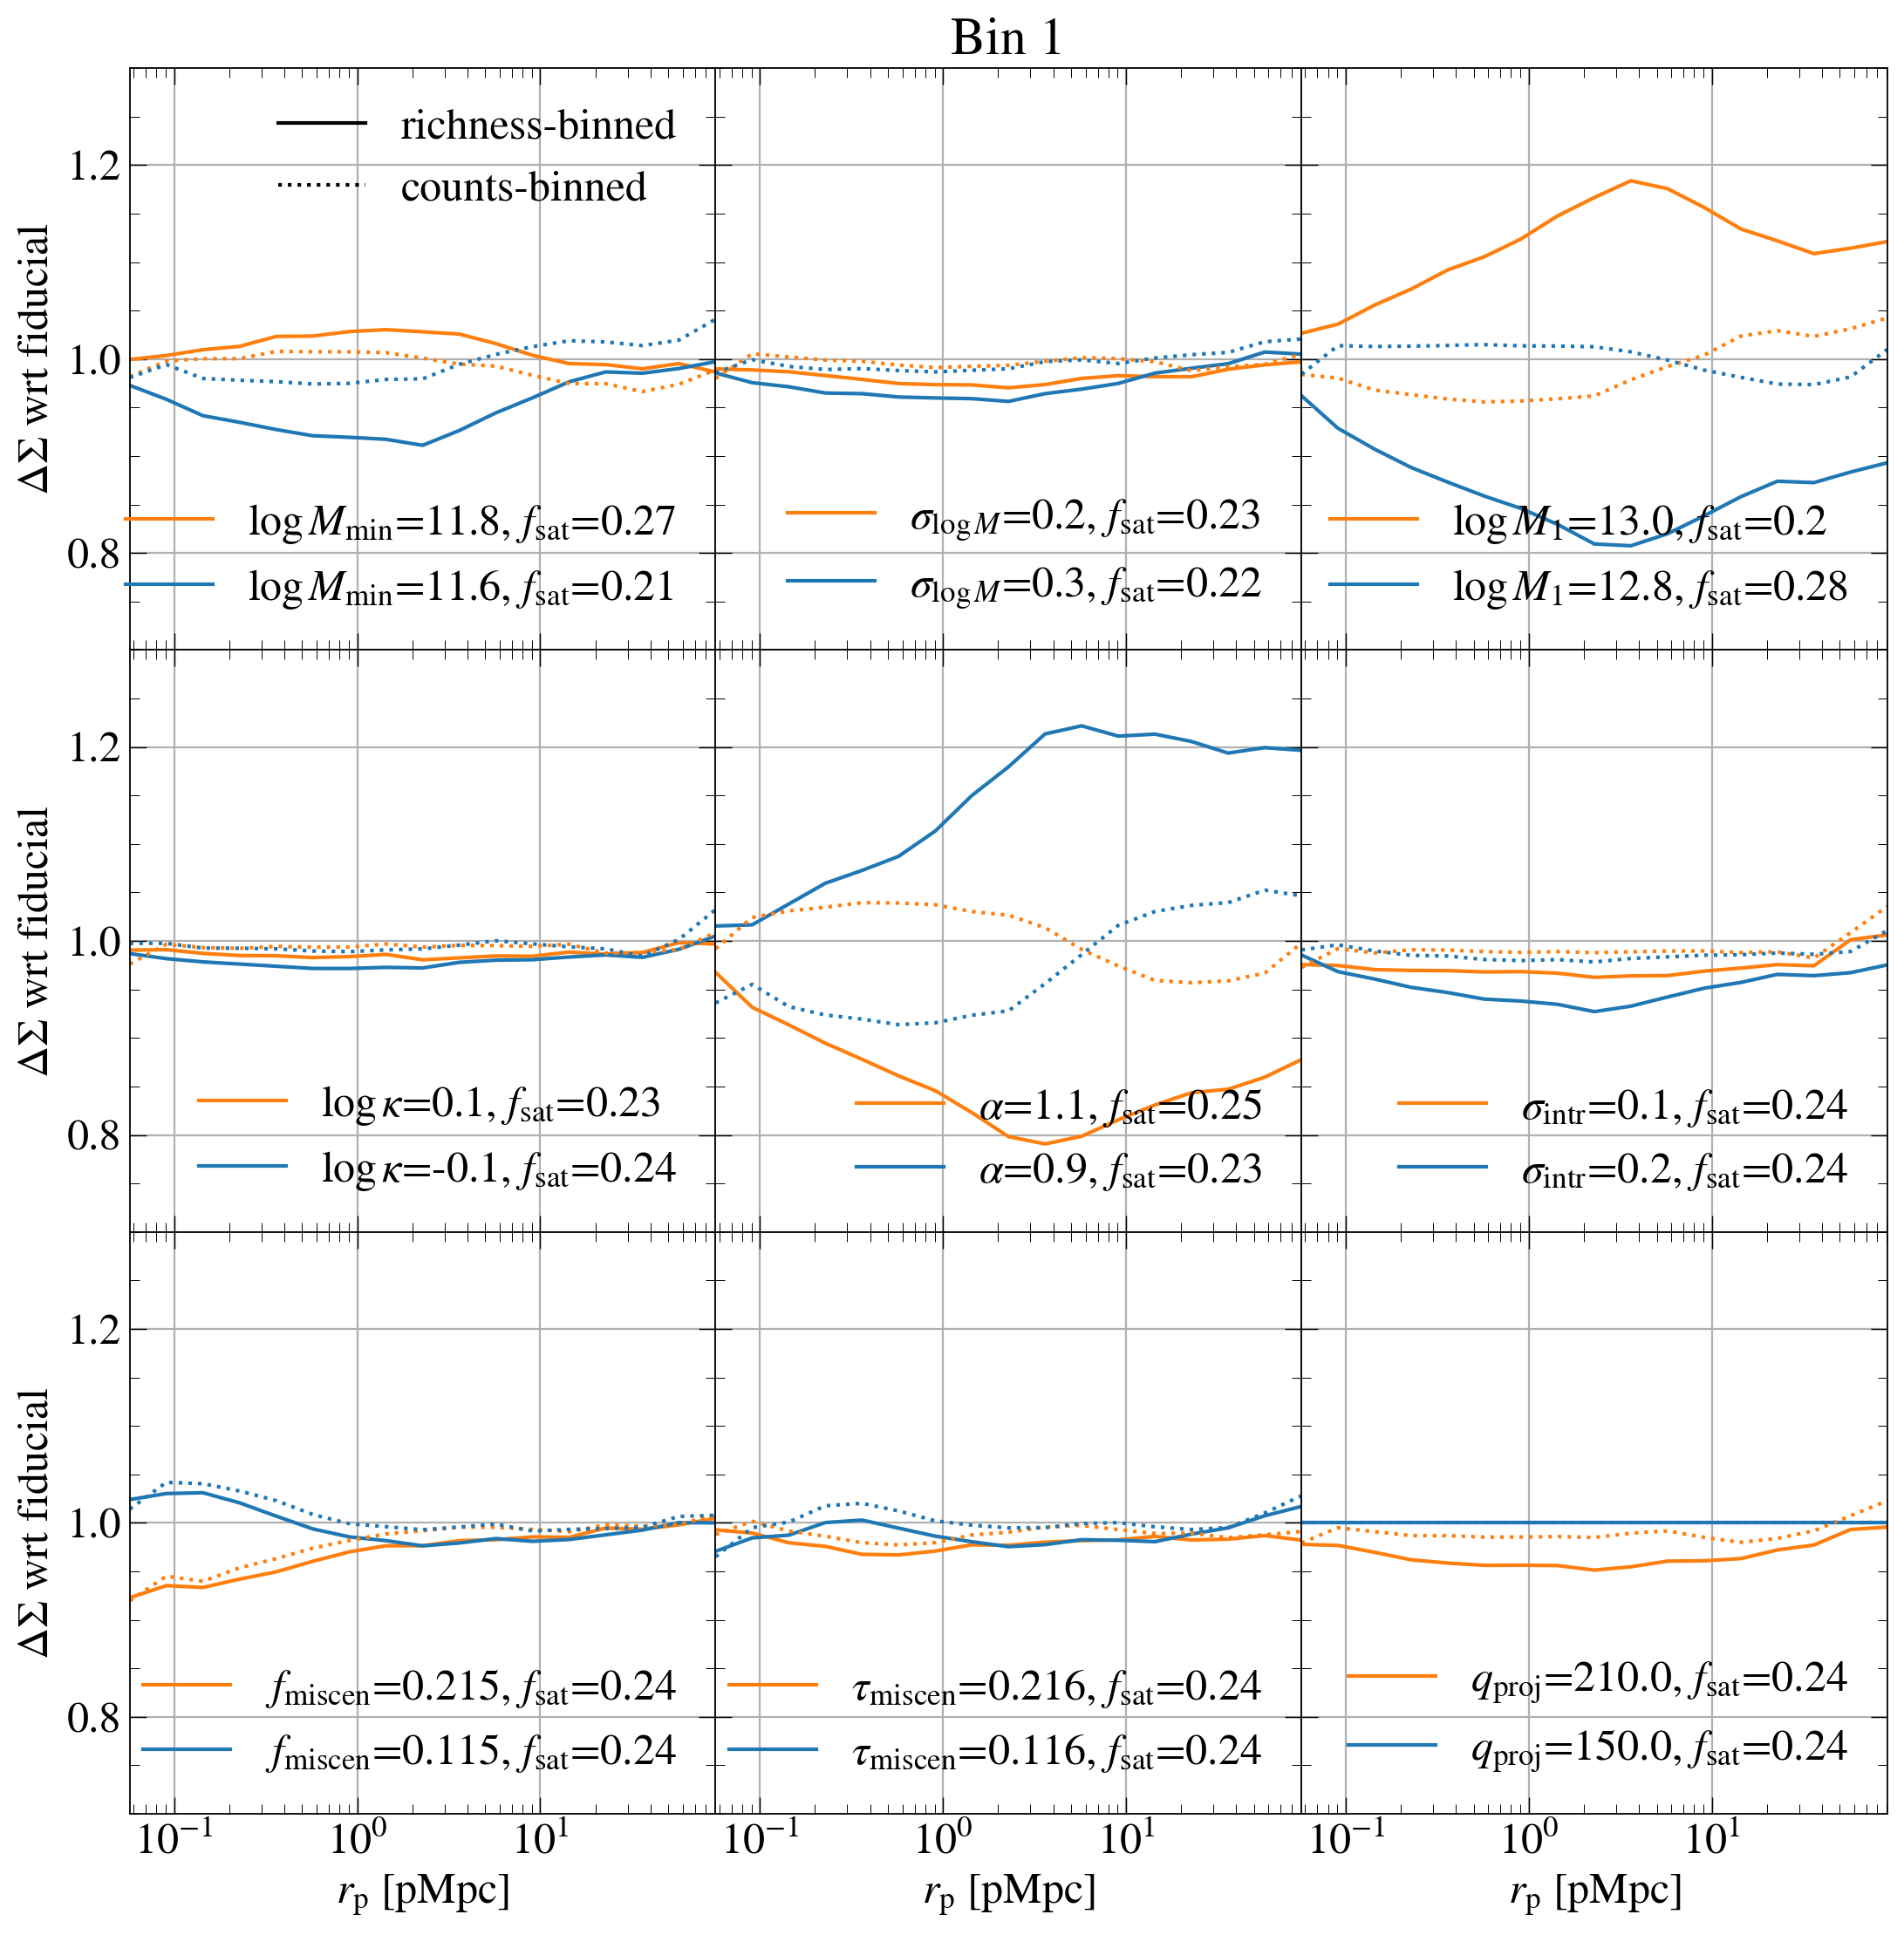

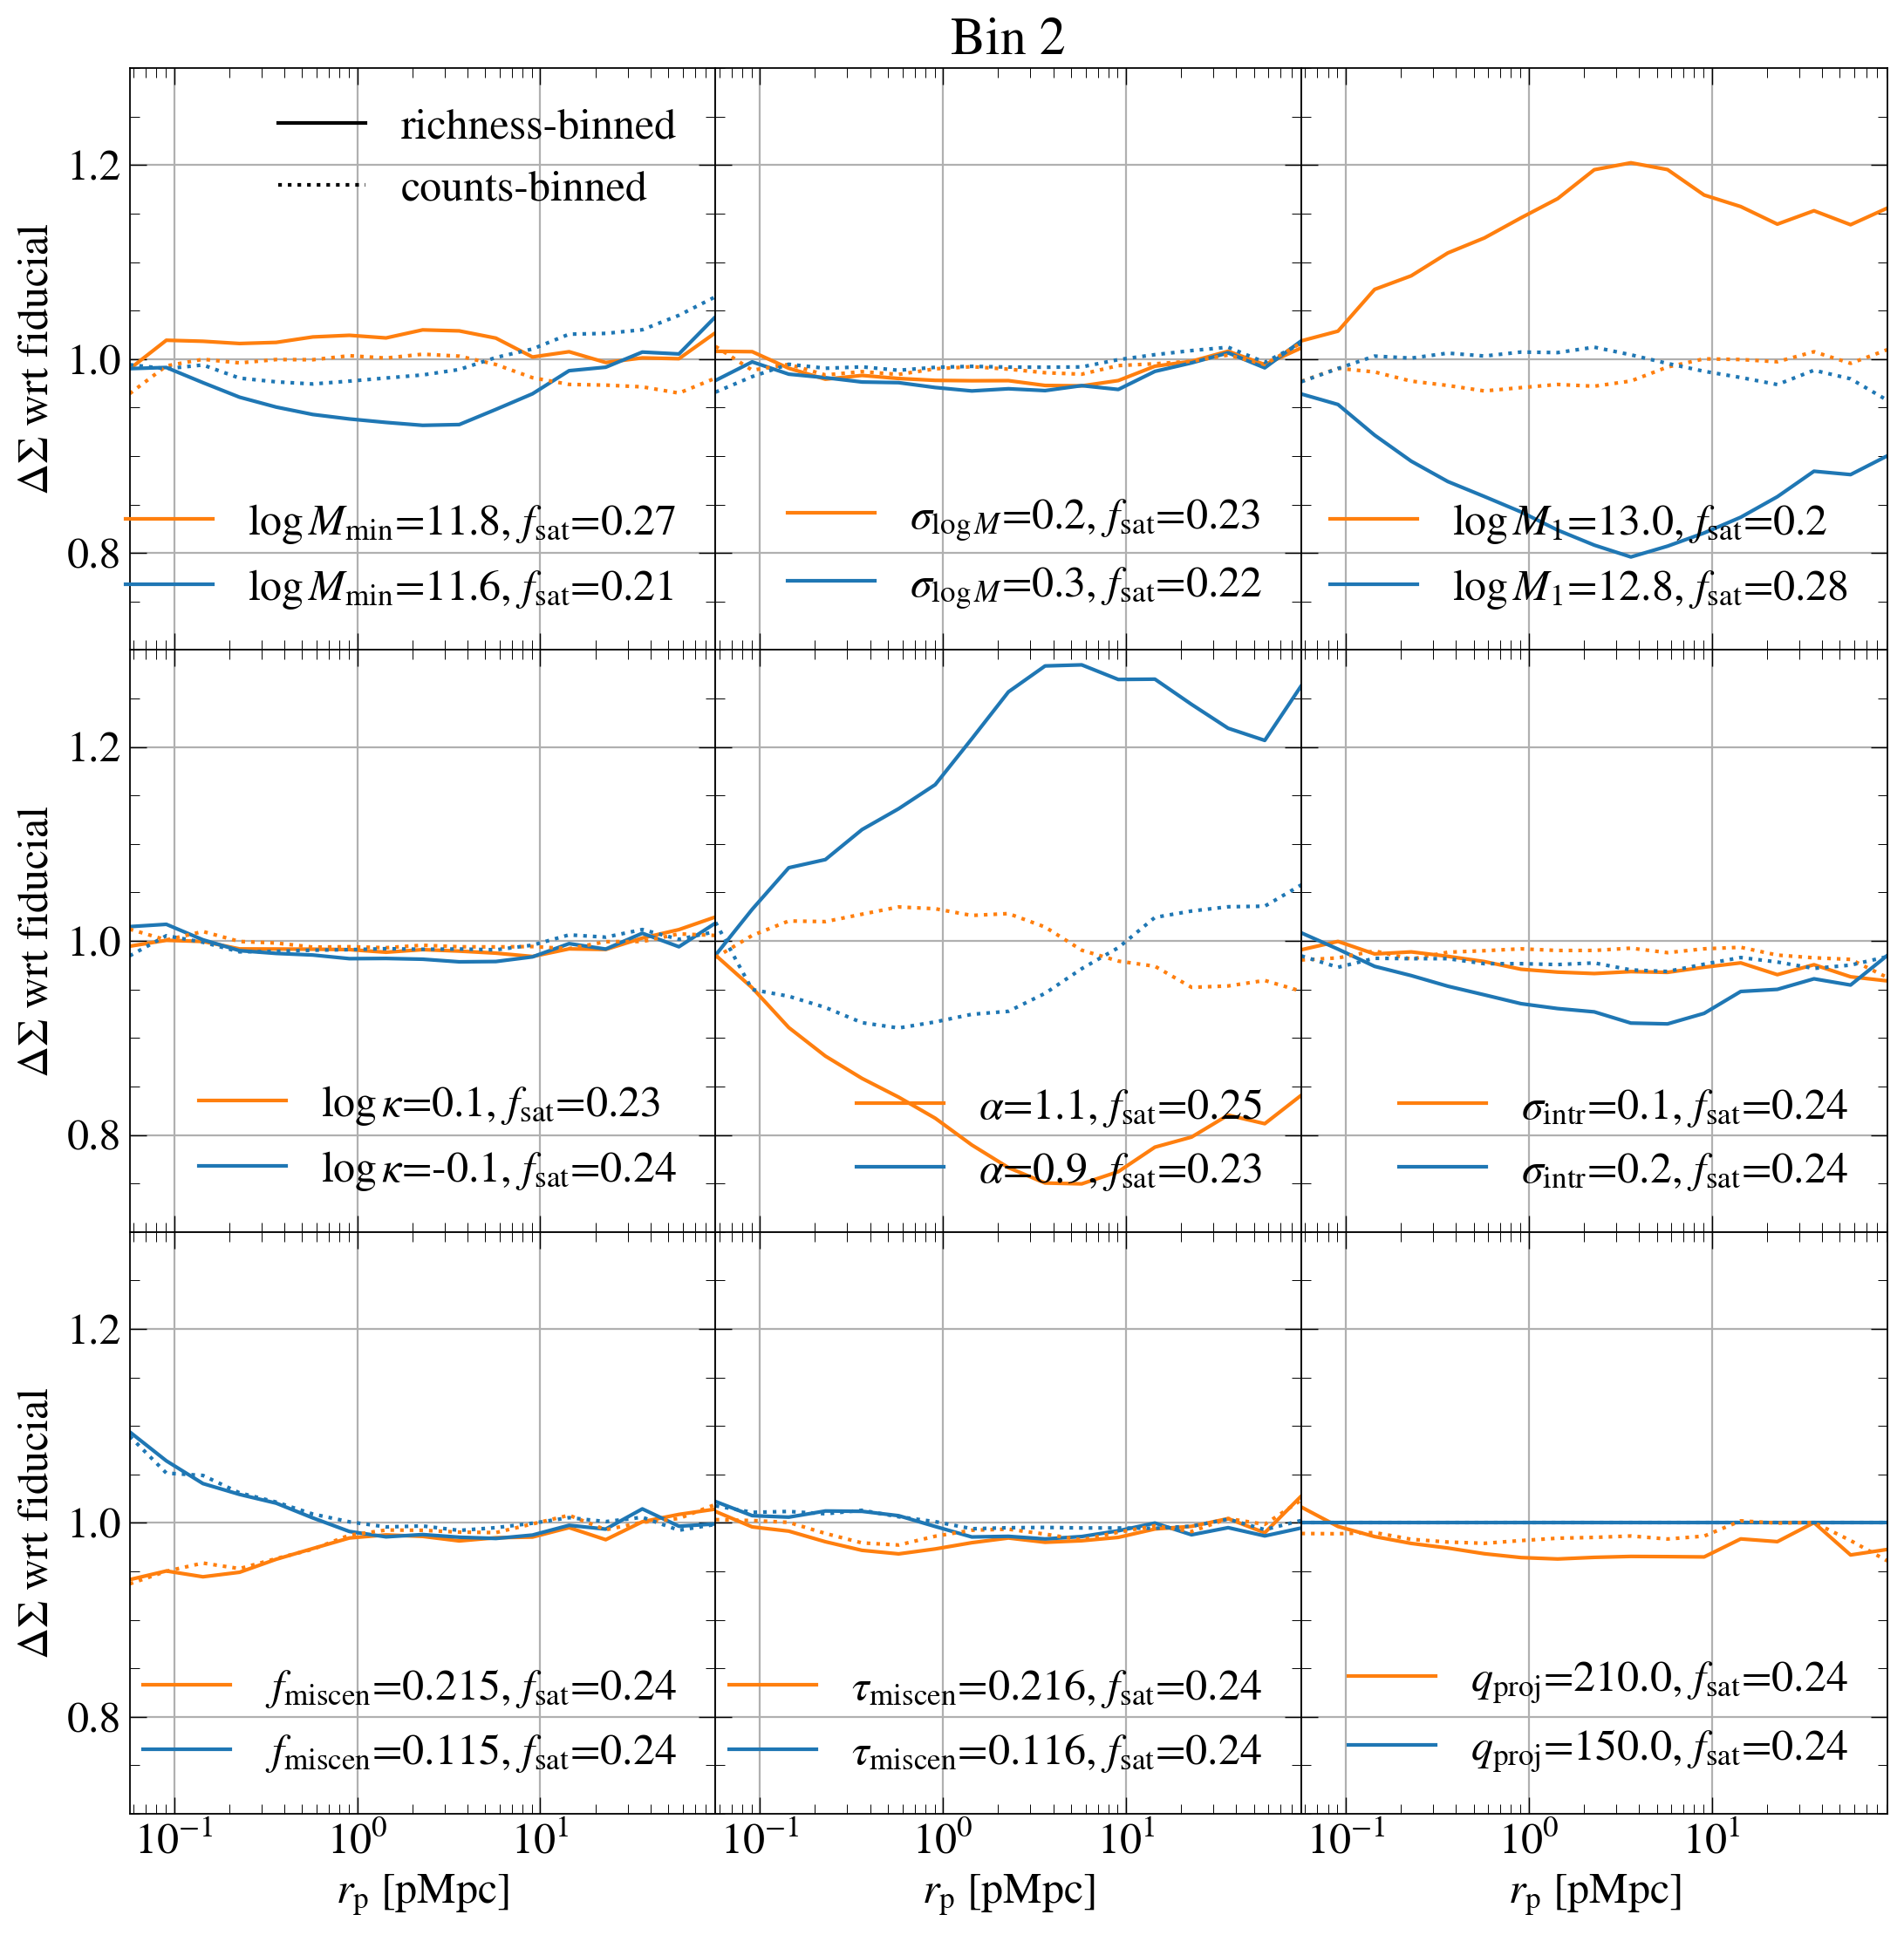

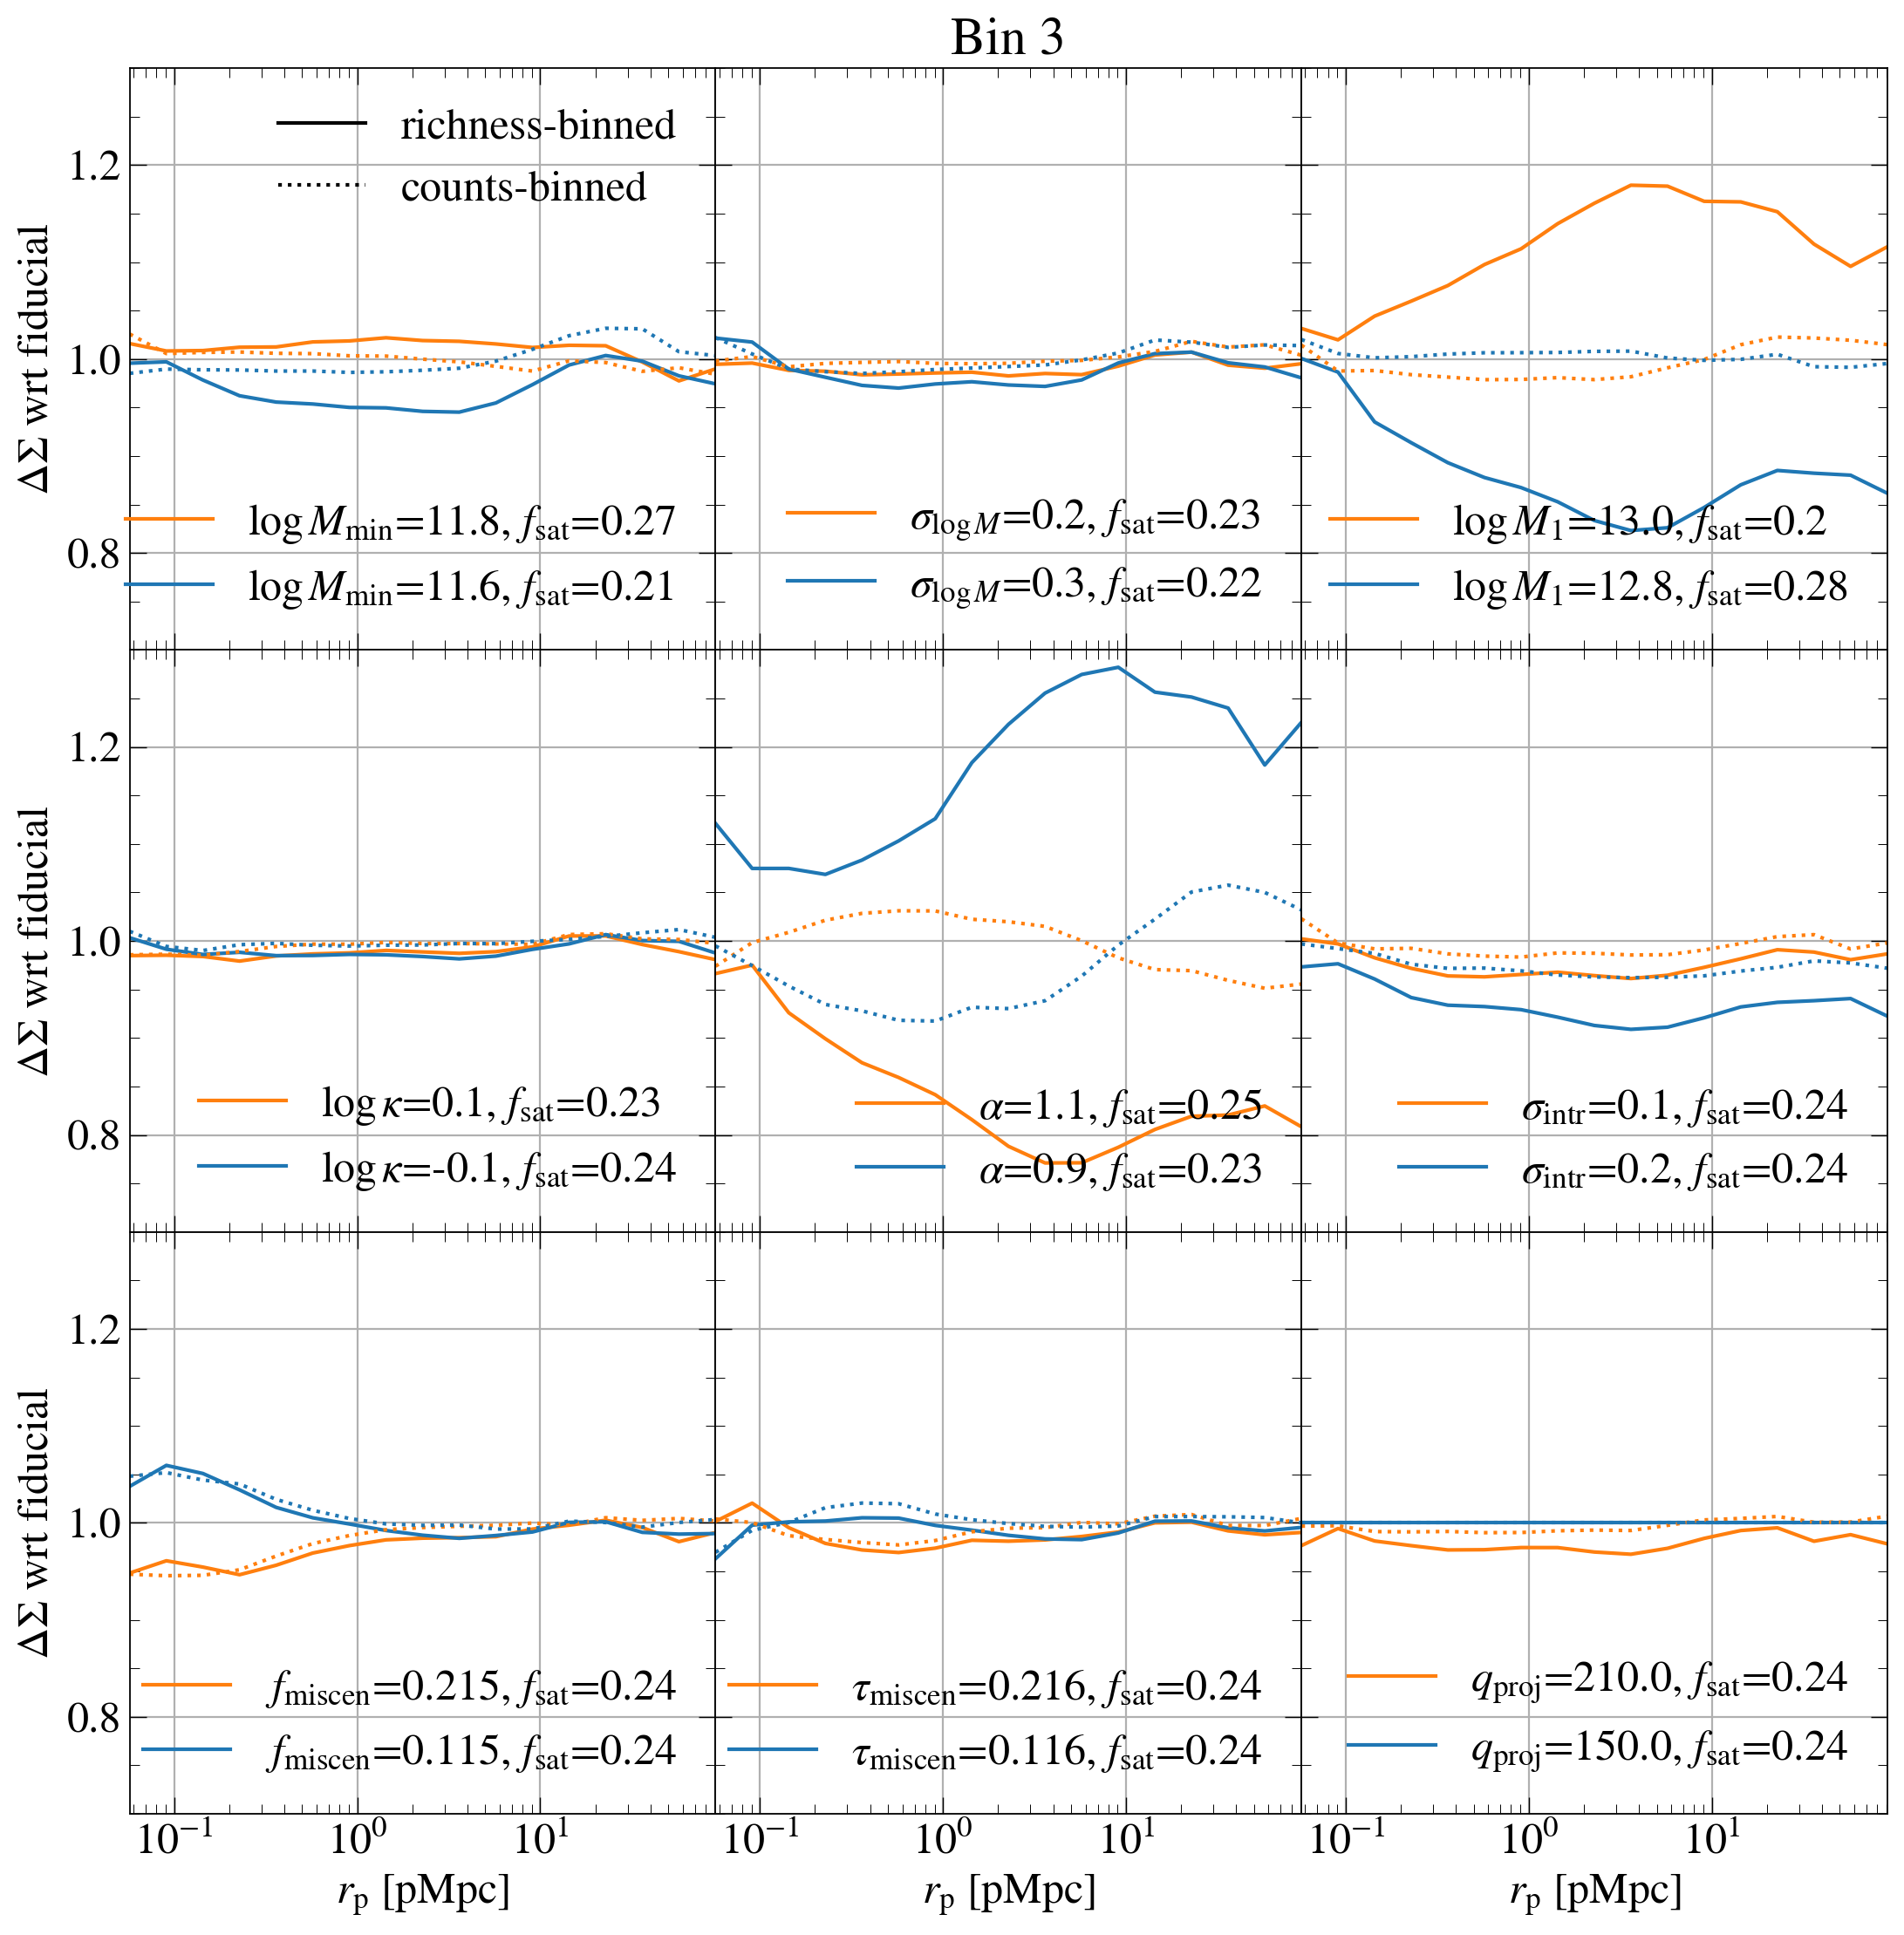

In [4]:
for ibin in range(4):    
    fig, axes = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(13, 13), gridspec_kw = {'wspace':0, 'hspace':0})
    
    plt.subplot(3,3,1) # add legend only to the first panel
    x = np.linspace(0.1,1)
    line1, = plt.plot(x, -100+0*x, c='k', ls='-', label='richness-binned')
    line2, = plt.plot(x, -100+0*x, c='k', ls=':', label='counts-binned')
    legend1 = plt.legend(handles=[line1, line2], loc=1, frameon=False)
    plt.gca().add_artist(legend1)
    #plt.legend(loc=4,frameon=False)
    
    plt.subplot(3,3,2) # add bin id to the second panel
    plt.title(f'Bin {ibin}')
    
    for binning in ['lam', 'abun']:    
        fname = data_loc + f'DS_phys_noh_{binning}_bin_{ibin}.dat'
        rp, DS_fid = np.loadtxt(fname, unpack=True)
           
        for ipanel, ipara in enumerate(ipara_list): 
            plt.subplot(3,3,ipanel+1)
            legend_handles = []
            for hod_id in [ipara*2+1, ipara*2+2]:         
                hod_para = get_hod_para(hod_id)
                data_loc = loc + f'base_c{cosmo_id:0>3d}_ph000/z0p300/model_hod{hod_id:0>6d}/obs_q180_bg_miscen_desy1/'
                fname = data_loc + f'DS_phys_noh_{binning}_bin_{ibin}.dat'
                rp, DS = np.loadtxt(fname, unpack=True)
    
                if hod_id == ipara*2+1:
                    c = 'C1'#'red'
                if hod_id == ipara*2+2:
                    c = 'C0'#'blue'
    
                if binning == 'lam':
                    ls = '-'
                if binning == 'abun':
                    ls = ':'
                
                key = key_list[ipara]
                key2 = key_list2[ipara]
    
                # add satellite fraction
                fsat = np.loadtxt(data_loc+'../fsat.dat')
                
                label = f'{key2}={hod_para[key]}, ' + r'$f_{\rm sat}$' + f'={fsat:.2g}'
                line3, = plt.plot(rp, DS/DS_fid, c=c, ls=ls, label=label)
                legend_handles.append(line3)
                plt.ylim(0.7, 1.3)
                plt.xscale('log')
                
                if binning == 'lam':
                    plt.legend(handles=legend_handles, loc=4, frameon=False)
    
                if ipanel > 5:
                    plt.xlabel(r'$r_{\rm p} ~ [{\rm pMpc}]$')
                if ipanel % 3 == 0:
                    #plt.ylabel(r'$\rm r_{\rm p} \Delta\Sigma ~ [{\rm pMpc M_\odot ppc^{-2}}]$')
                    plt.ylabel(r'$\Delta\Sigma$ wrt fiducial')
    
    
    if ibin == 0:
        plt.savefig(f'../../plots/for_paper/sensitivities_hod_lensing_bin{ibin}.pdf')

# Sensitivity of lensing bias 

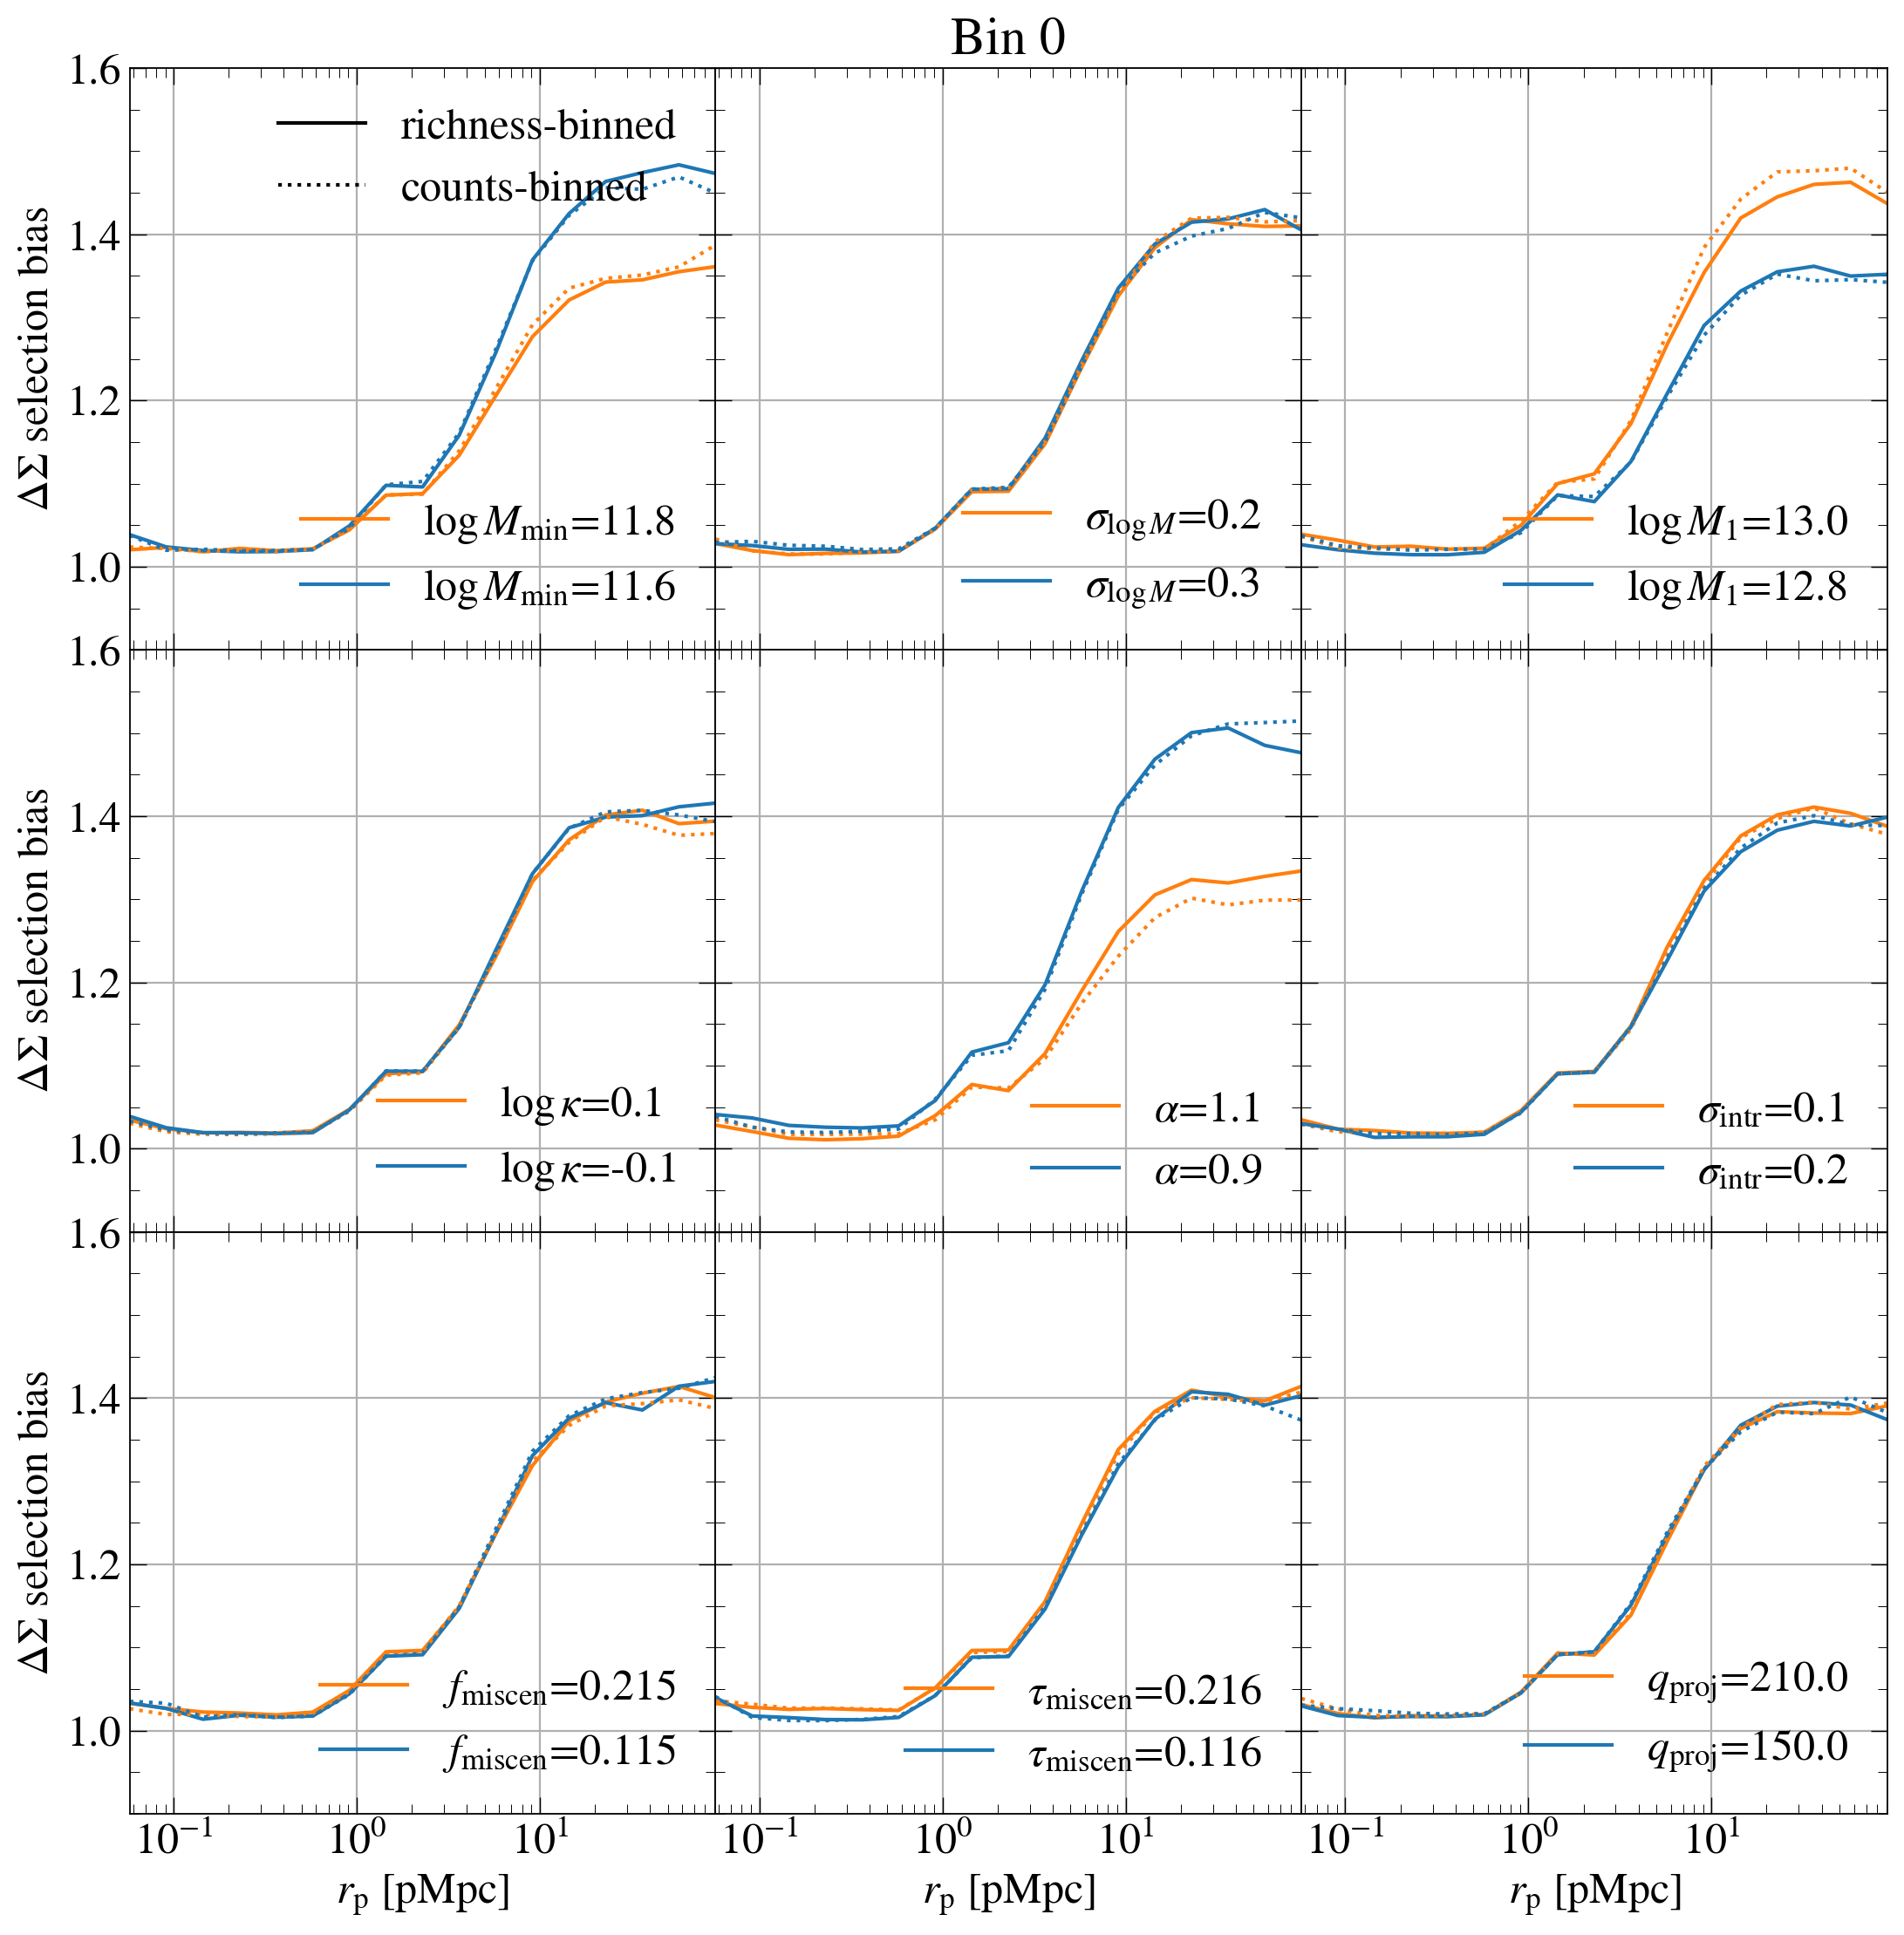

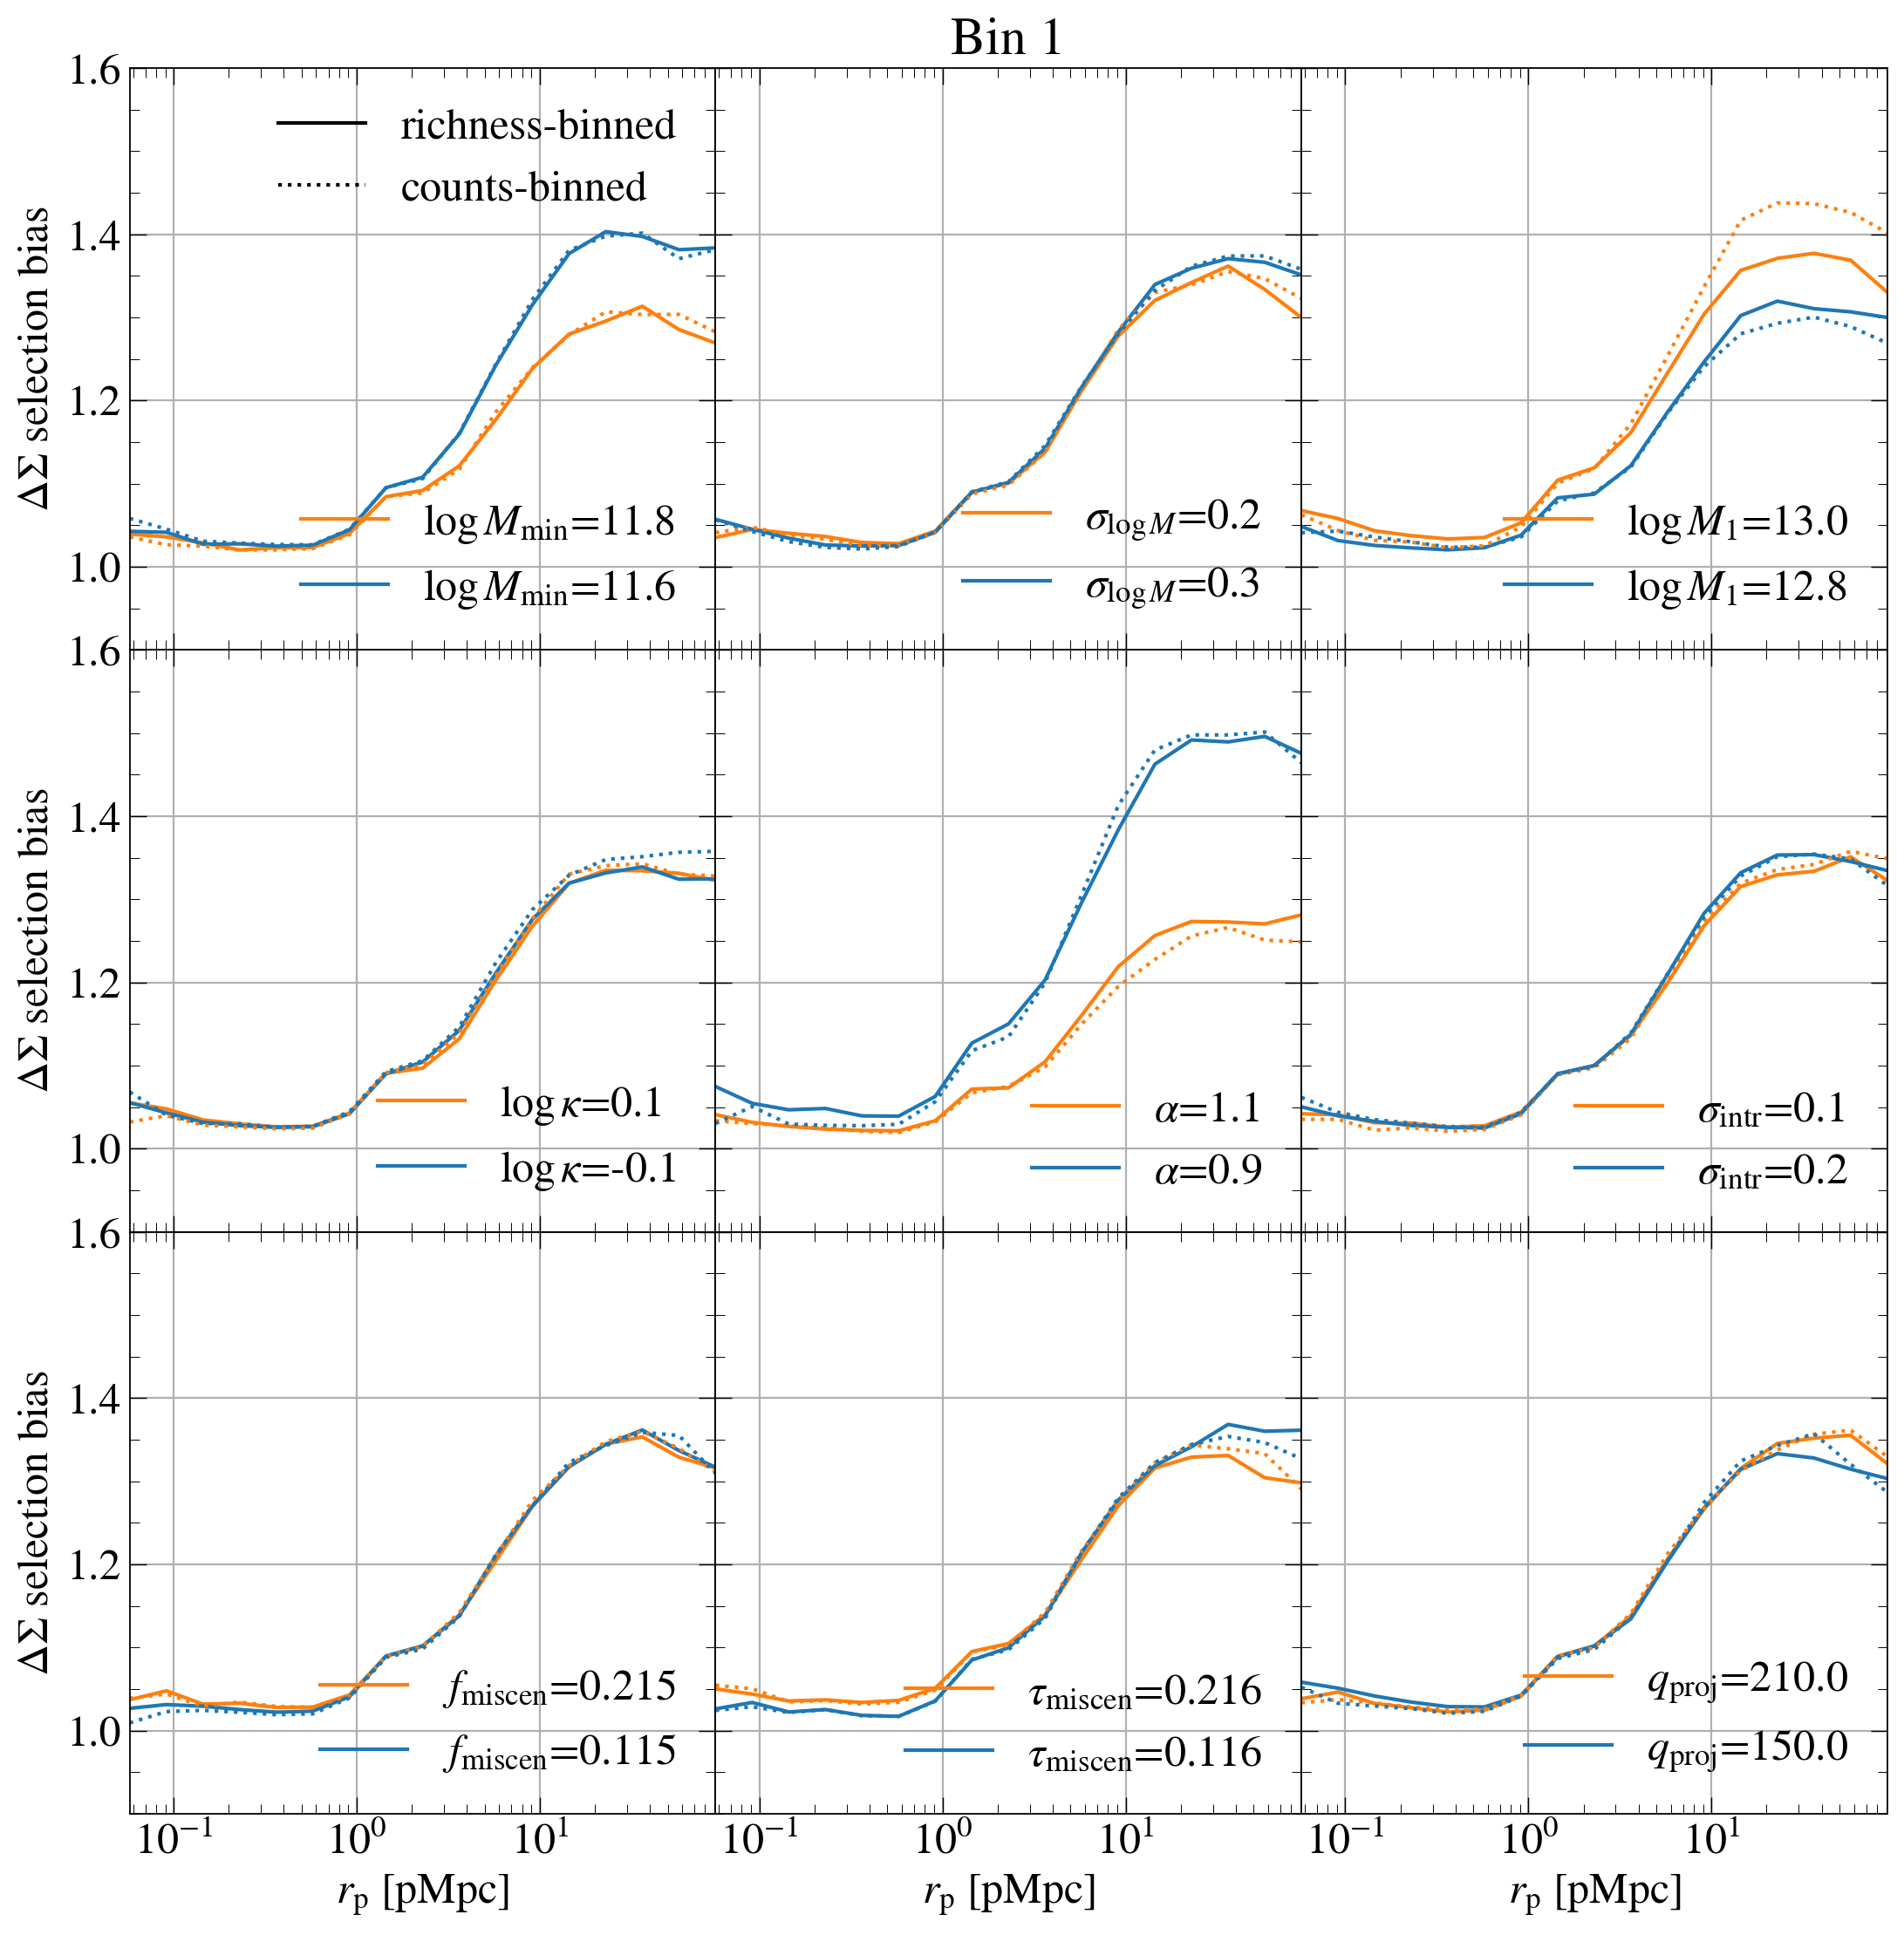

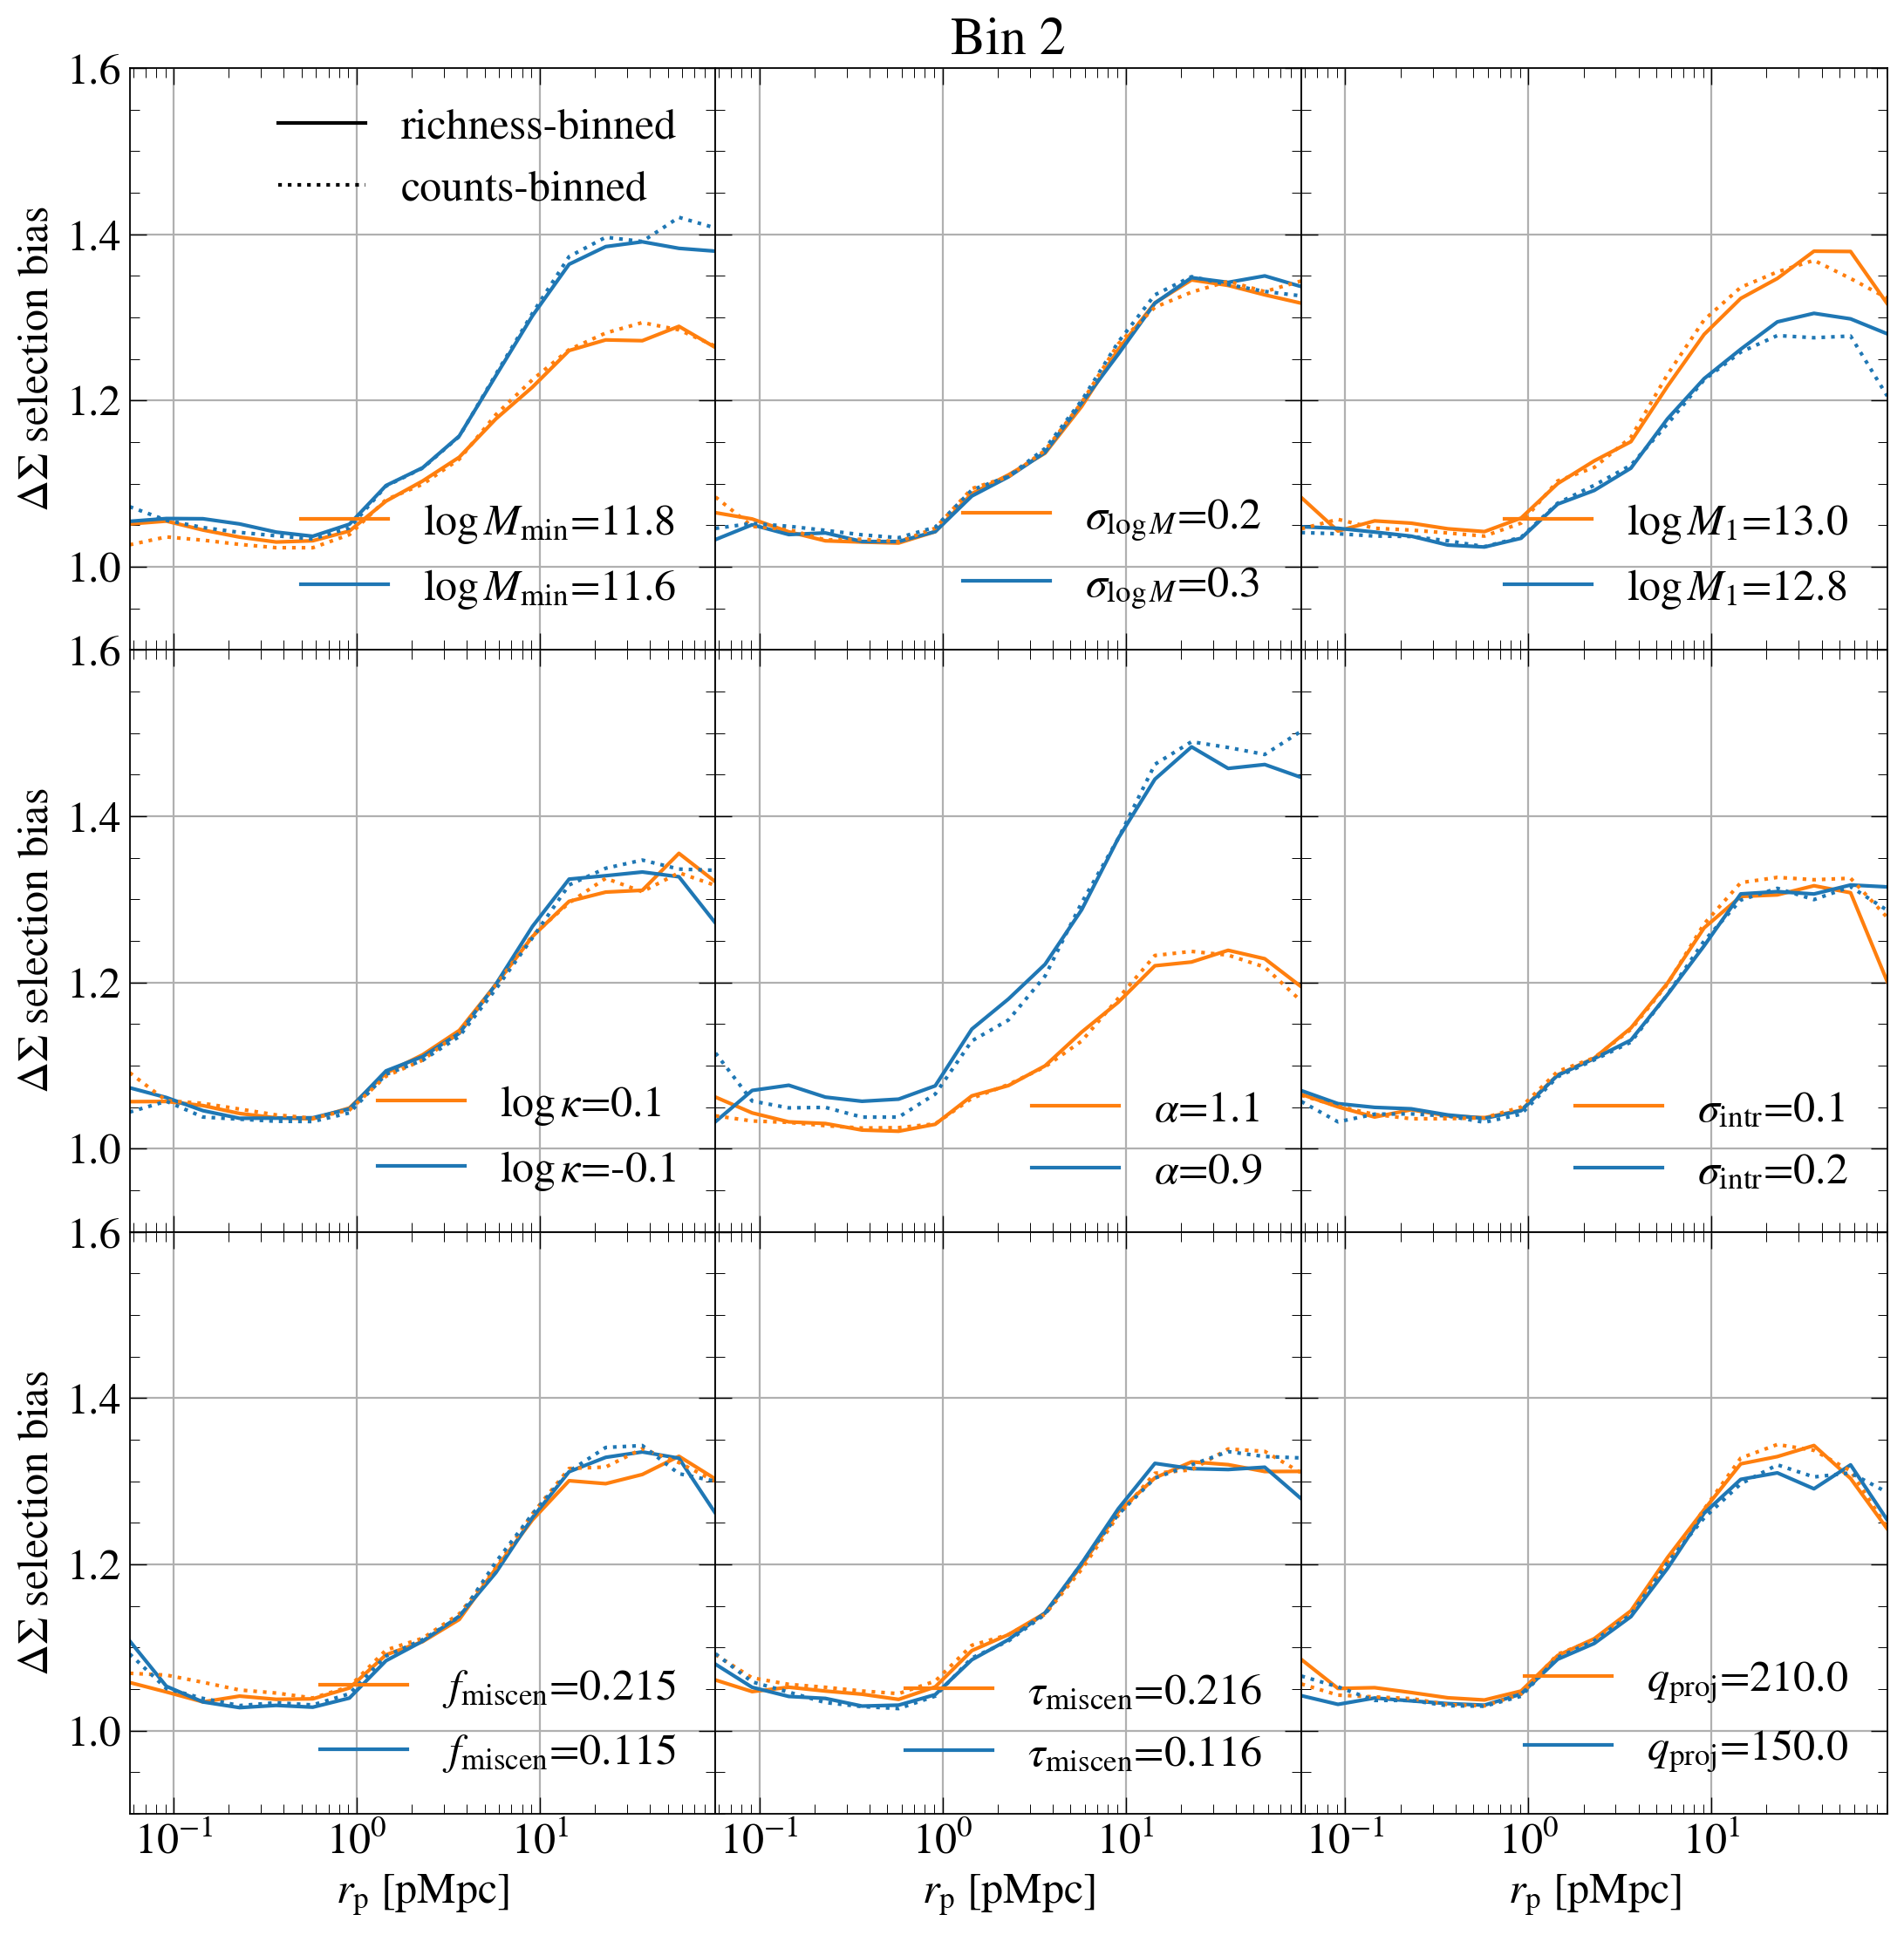

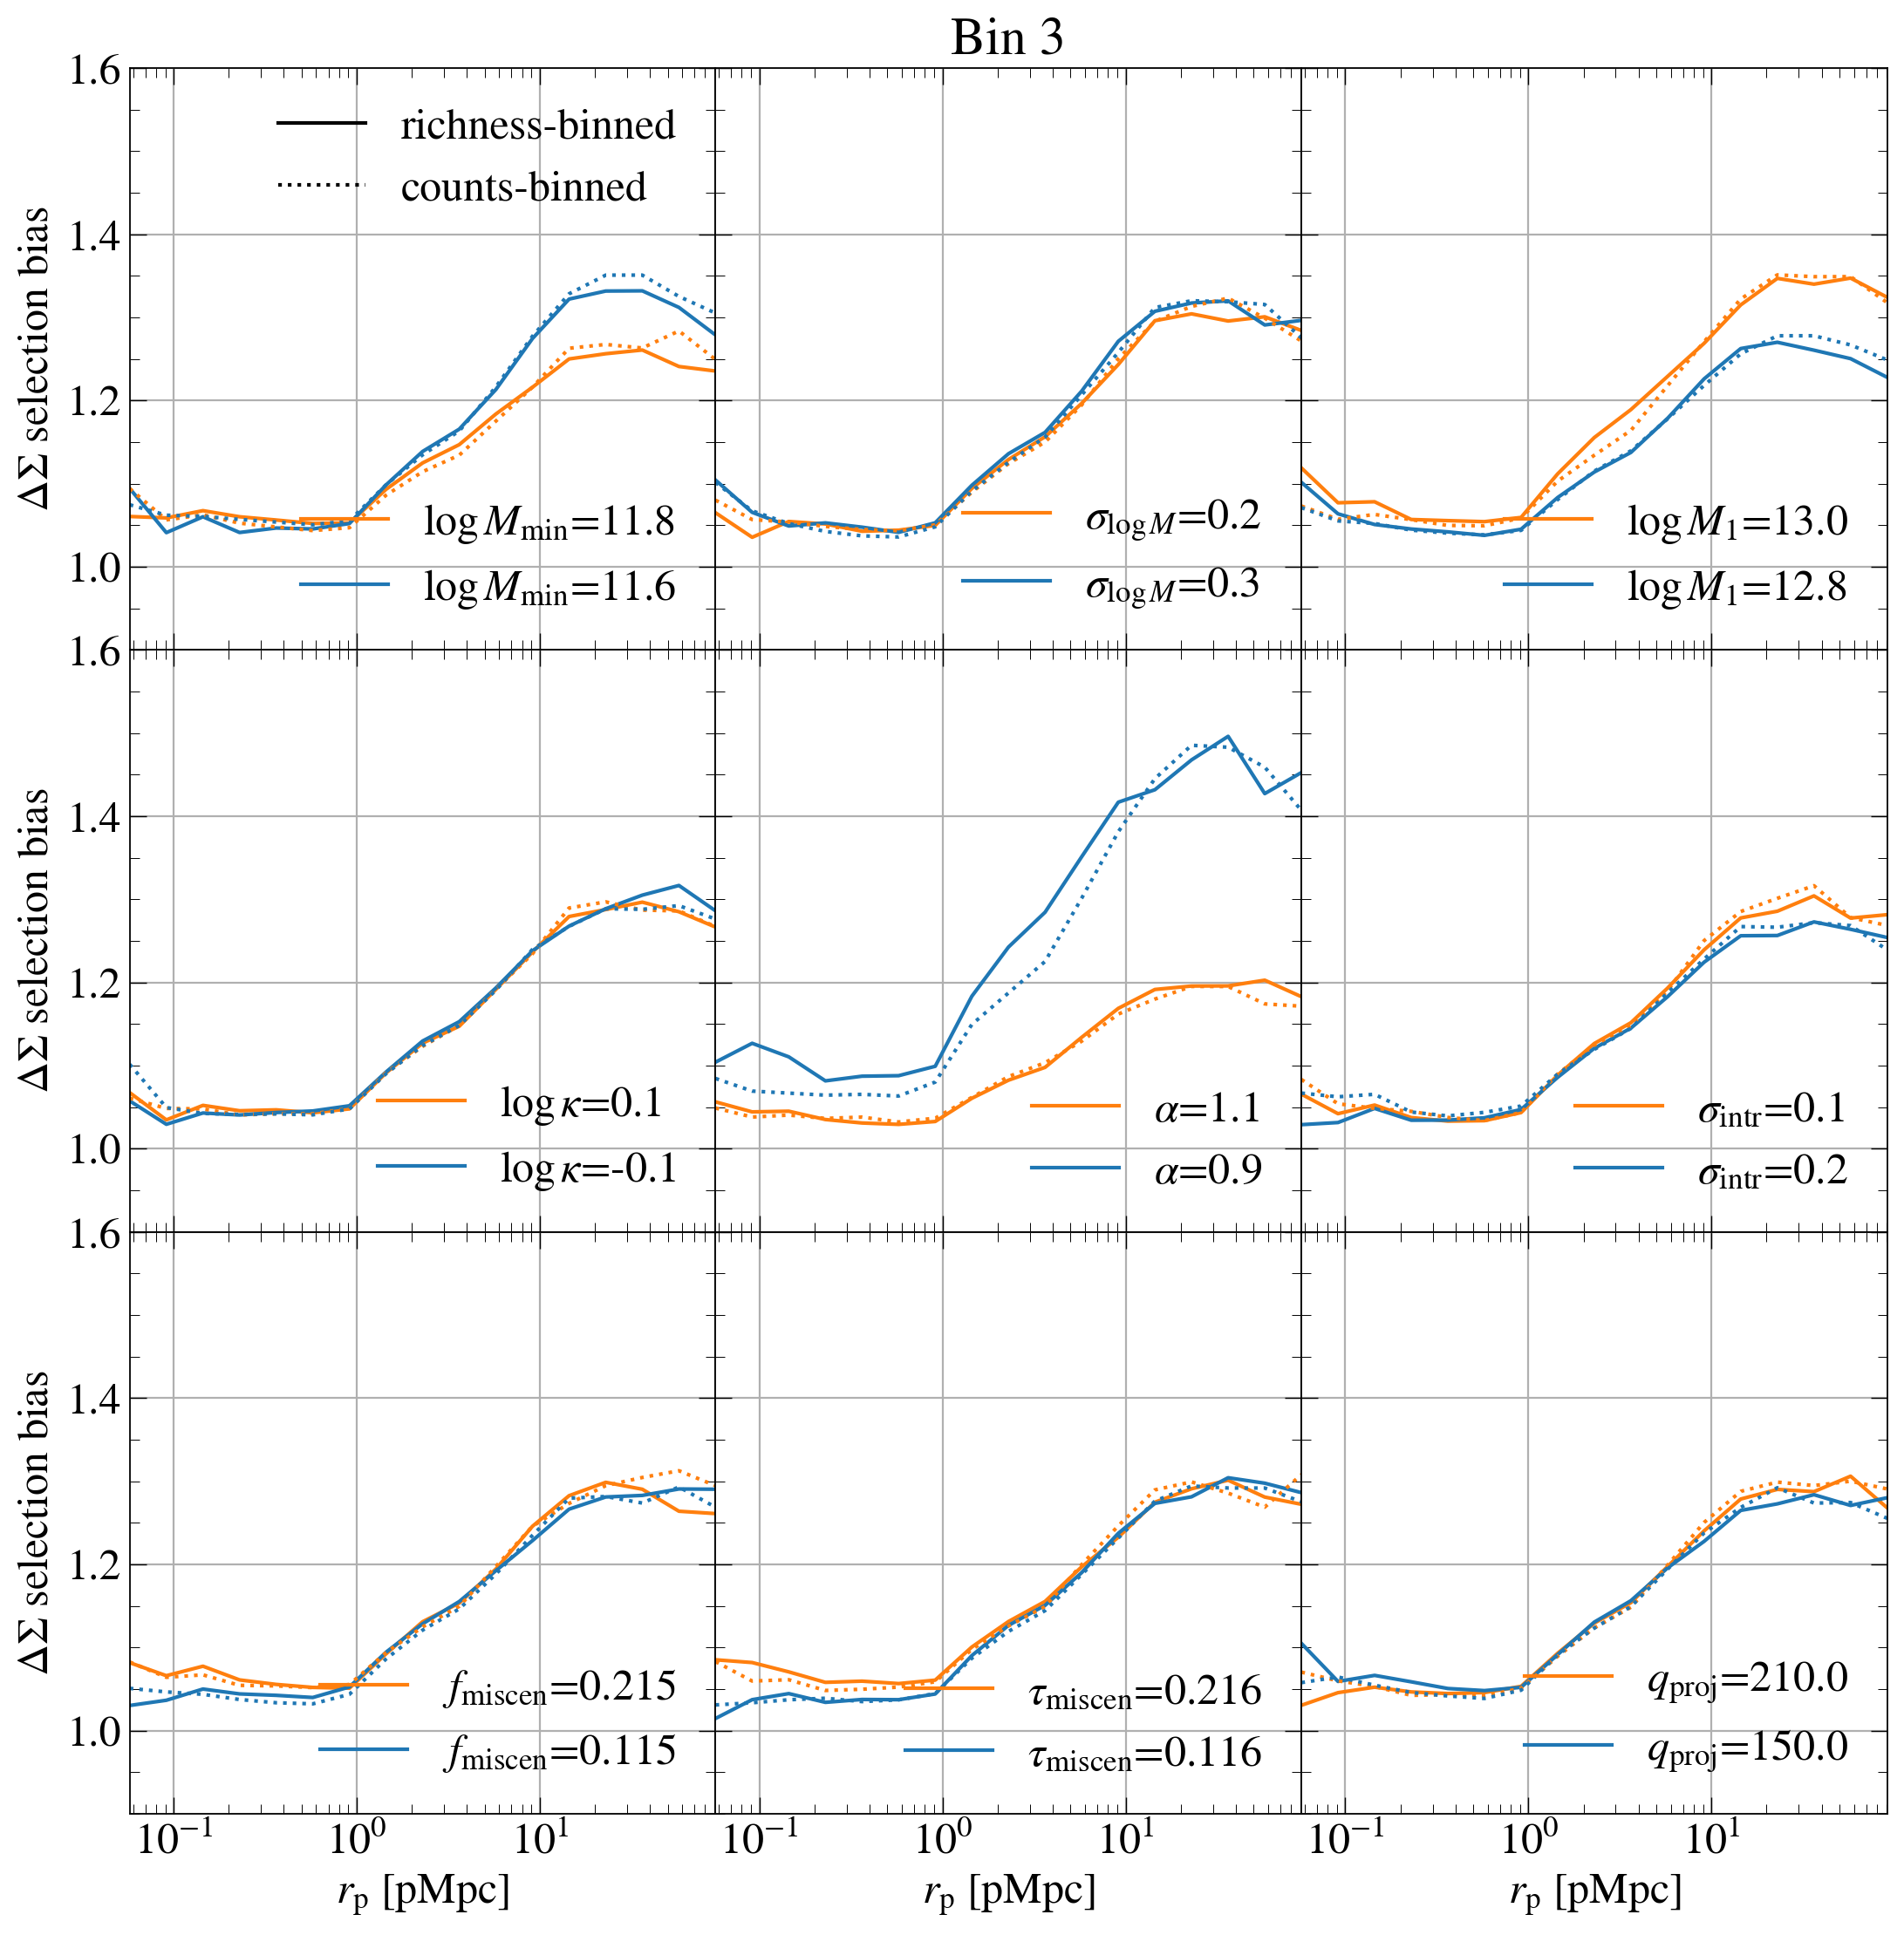

In [5]:
for ibin in range(4):    
    fig, axes = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(13, 13), gridspec_kw = {'wspace':0, 'hspace':0})
    
    plt.subplot(3,3,1) # add legend only to the first panel
    x = np.linspace(0.1,1)
    line1, = plt.plot(x, -100+0*x, c='k', ls='-', label='richness-binned')
    line2, = plt.plot(x, -100+0*x, c='k', ls=':', label='counts-binned')
    legend1 = plt.legend(handles=[line1, line2], loc=1, frameon=False)
    plt.gca().add_artist(legend1)
    #plt.legend(loc=4,frameon=False)
    
    plt.subplot(3,3,2) # add bin id to the second panel
    plt.title(f'Bin {ibin}')
    
    for binning in ['lam', 'abun']:
        
        fname = data_loc + f'DS_phys_noh_{binning}_bin_{ibin}.dat'
        rp, DS_fid = np.loadtxt(fname, unpack=True)
        
        for ipanel, ipara in enumerate(ipara_list): 
            plt.subplot(3,3,ipanel+1)    
            legend_handles = []
            for hod_id in [ipara*2+1, ipara*2+2]:         
                hod_para = get_hod_para(hod_id)
                data_loc = loc + f'base_c{cosmo_id:0>3d}_ph000/z0p300/model_hod{hod_id:0>6d}/obs_q180_bg_miscen_desy1/'
                fname = data_loc + f'DS_{binning}_bin_{ibin}.dat'
                rp, DS, DS_match = np.loadtxt(fname, unpack=True)
                bias = DS/DS_match
                h = 0.67
                a = 1/(1+redshift)
                rp = rp * a / h
    
                if hod_id == ipara*2+1:
                    c = 'C1'#'red'
                if hod_id == ipara*2+2:
                    c = 'C0'#'blue'
    
                if binning == 'lam':
                    ls = '-'
                if binning == 'abun':
                    ls = ':'
                
                key = key_list[ipara]
                key2 = key_list2[ipara]
                label = f'{key2}={hod_para[key]}'
                line3, = plt.plot(rp, bias, c=c, ls=ls, label=label)
                legend_handles.append(line3)
                plt.ylim(0.9, 1.6)
    
                plt.xscale('log')
                if binning == 'lam':
                    plt.legend(handles=legend_handles, loc=4, frameon=False)
                if ipanel > 5:
                    plt.xlabel(r'$r_{\rm p} ~ [{\rm pMpc}]$')
                if ipanel % 3 == 0:
                    #plt.ylabel(r'$\rm r_{\rm p} \Delta\Sigma ~ [{\rm pMpc M_\odot ppc^{-2}}]$')
                    plt.ylabel(r'$\Delta\Sigma$ selection bias')

    #if ibin==0:
    #    plt.savefig(f'../../plots/for_paper/sensitivities_hod_bias_bin{ibin}.pdf')

# Sensitivey of counts 

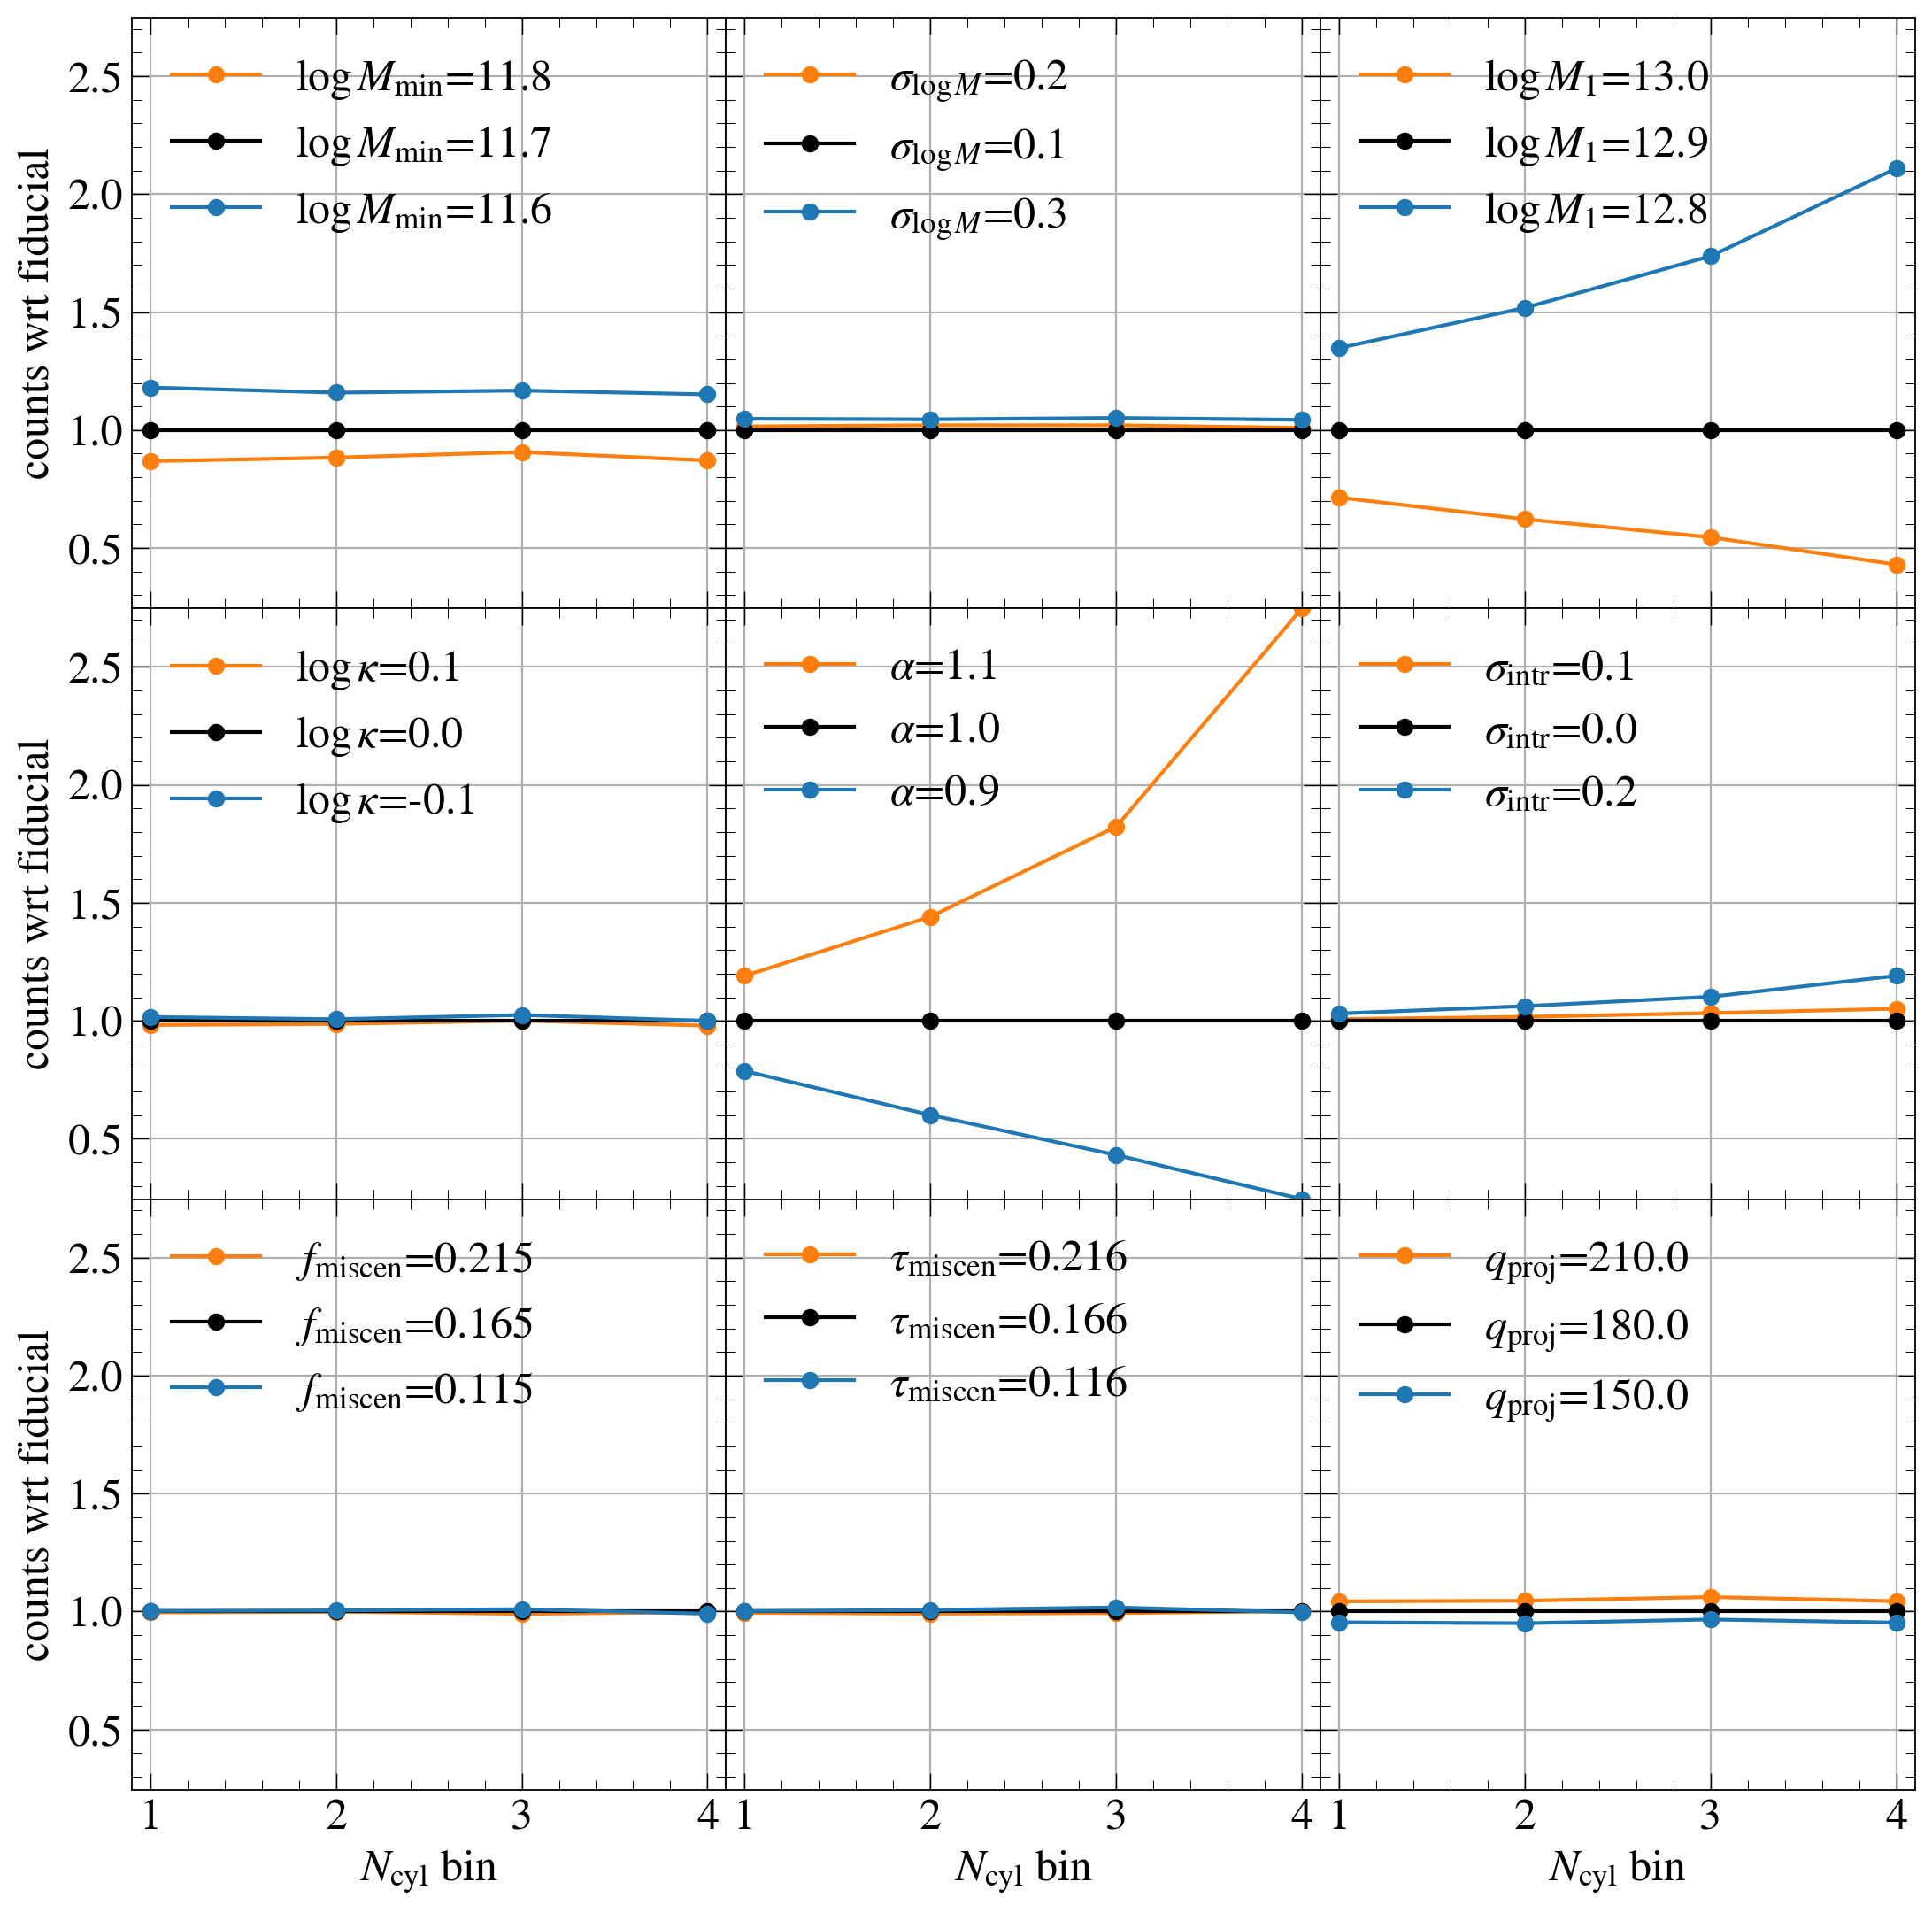

In [6]:
fig, axes = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(13, 13), gridspec_kw = {'wspace':0, 'hspace':0})

# get the fiducial
hod_id = 0
data_loc = loc + f'base_c{cosmo_id:0>3d}_ph000/z0p300/model_hod{hod_id:0>6d}/obs_q180_bg_miscen_desy1/'
fname = data_loc + 'abundance.dat'
lam_min, lam_max, counts_fid = np.loadtxt(fname, unpack=True)

for ipanel, ipara in enumerate(ipara_list):    
    plt.subplot(3,3,ipanel+1)
    for hod_id in [ipara*2+1, 0, ipara*2+2]:         
        hod_para = get_hod_para(hod_id)
        data_loc = loc + f'base_c{cosmo_id:0>3d}_ph000/z0p300/model_hod{hod_id:0>6d}/obs_q180_bg_miscen_desy1/'
        fname = data_loc + 'abundance.dat'

        lam_min, lam_max, counts = np.loadtxt(fname, unpack=True)

        if hod_id == 0:
            c='k'
        if hod_id == ipara*2+1:
            c='C1'#'red'
        if hod_id == ipara*2+2:
            c='C0'#'blue'
            
        key = key_list[ipara]
        key2 = key_list2[ipara]
        label = f'{key2}={hod_para[key]}'
        plt.plot(np.arange(1,5), counts/counts_fid, 'o-', c=c, label=label)
        plt.legend(loc=2, frameon=False)

        if ipanel > 5:
            plt.xlabel(r'$N_{\rm cyl}$ bin')
        if ipanel % 3 == 0:
            plt.ylabel(r'counts wrt fiducial')
        plt.xlim(0.9, 4.1)
        #plt.ylim(0.5, 1.5)

plt.savefig('../../plots/for_paper/sensitivities_hod_counts.pdf')

# sensitivity of mass PDF

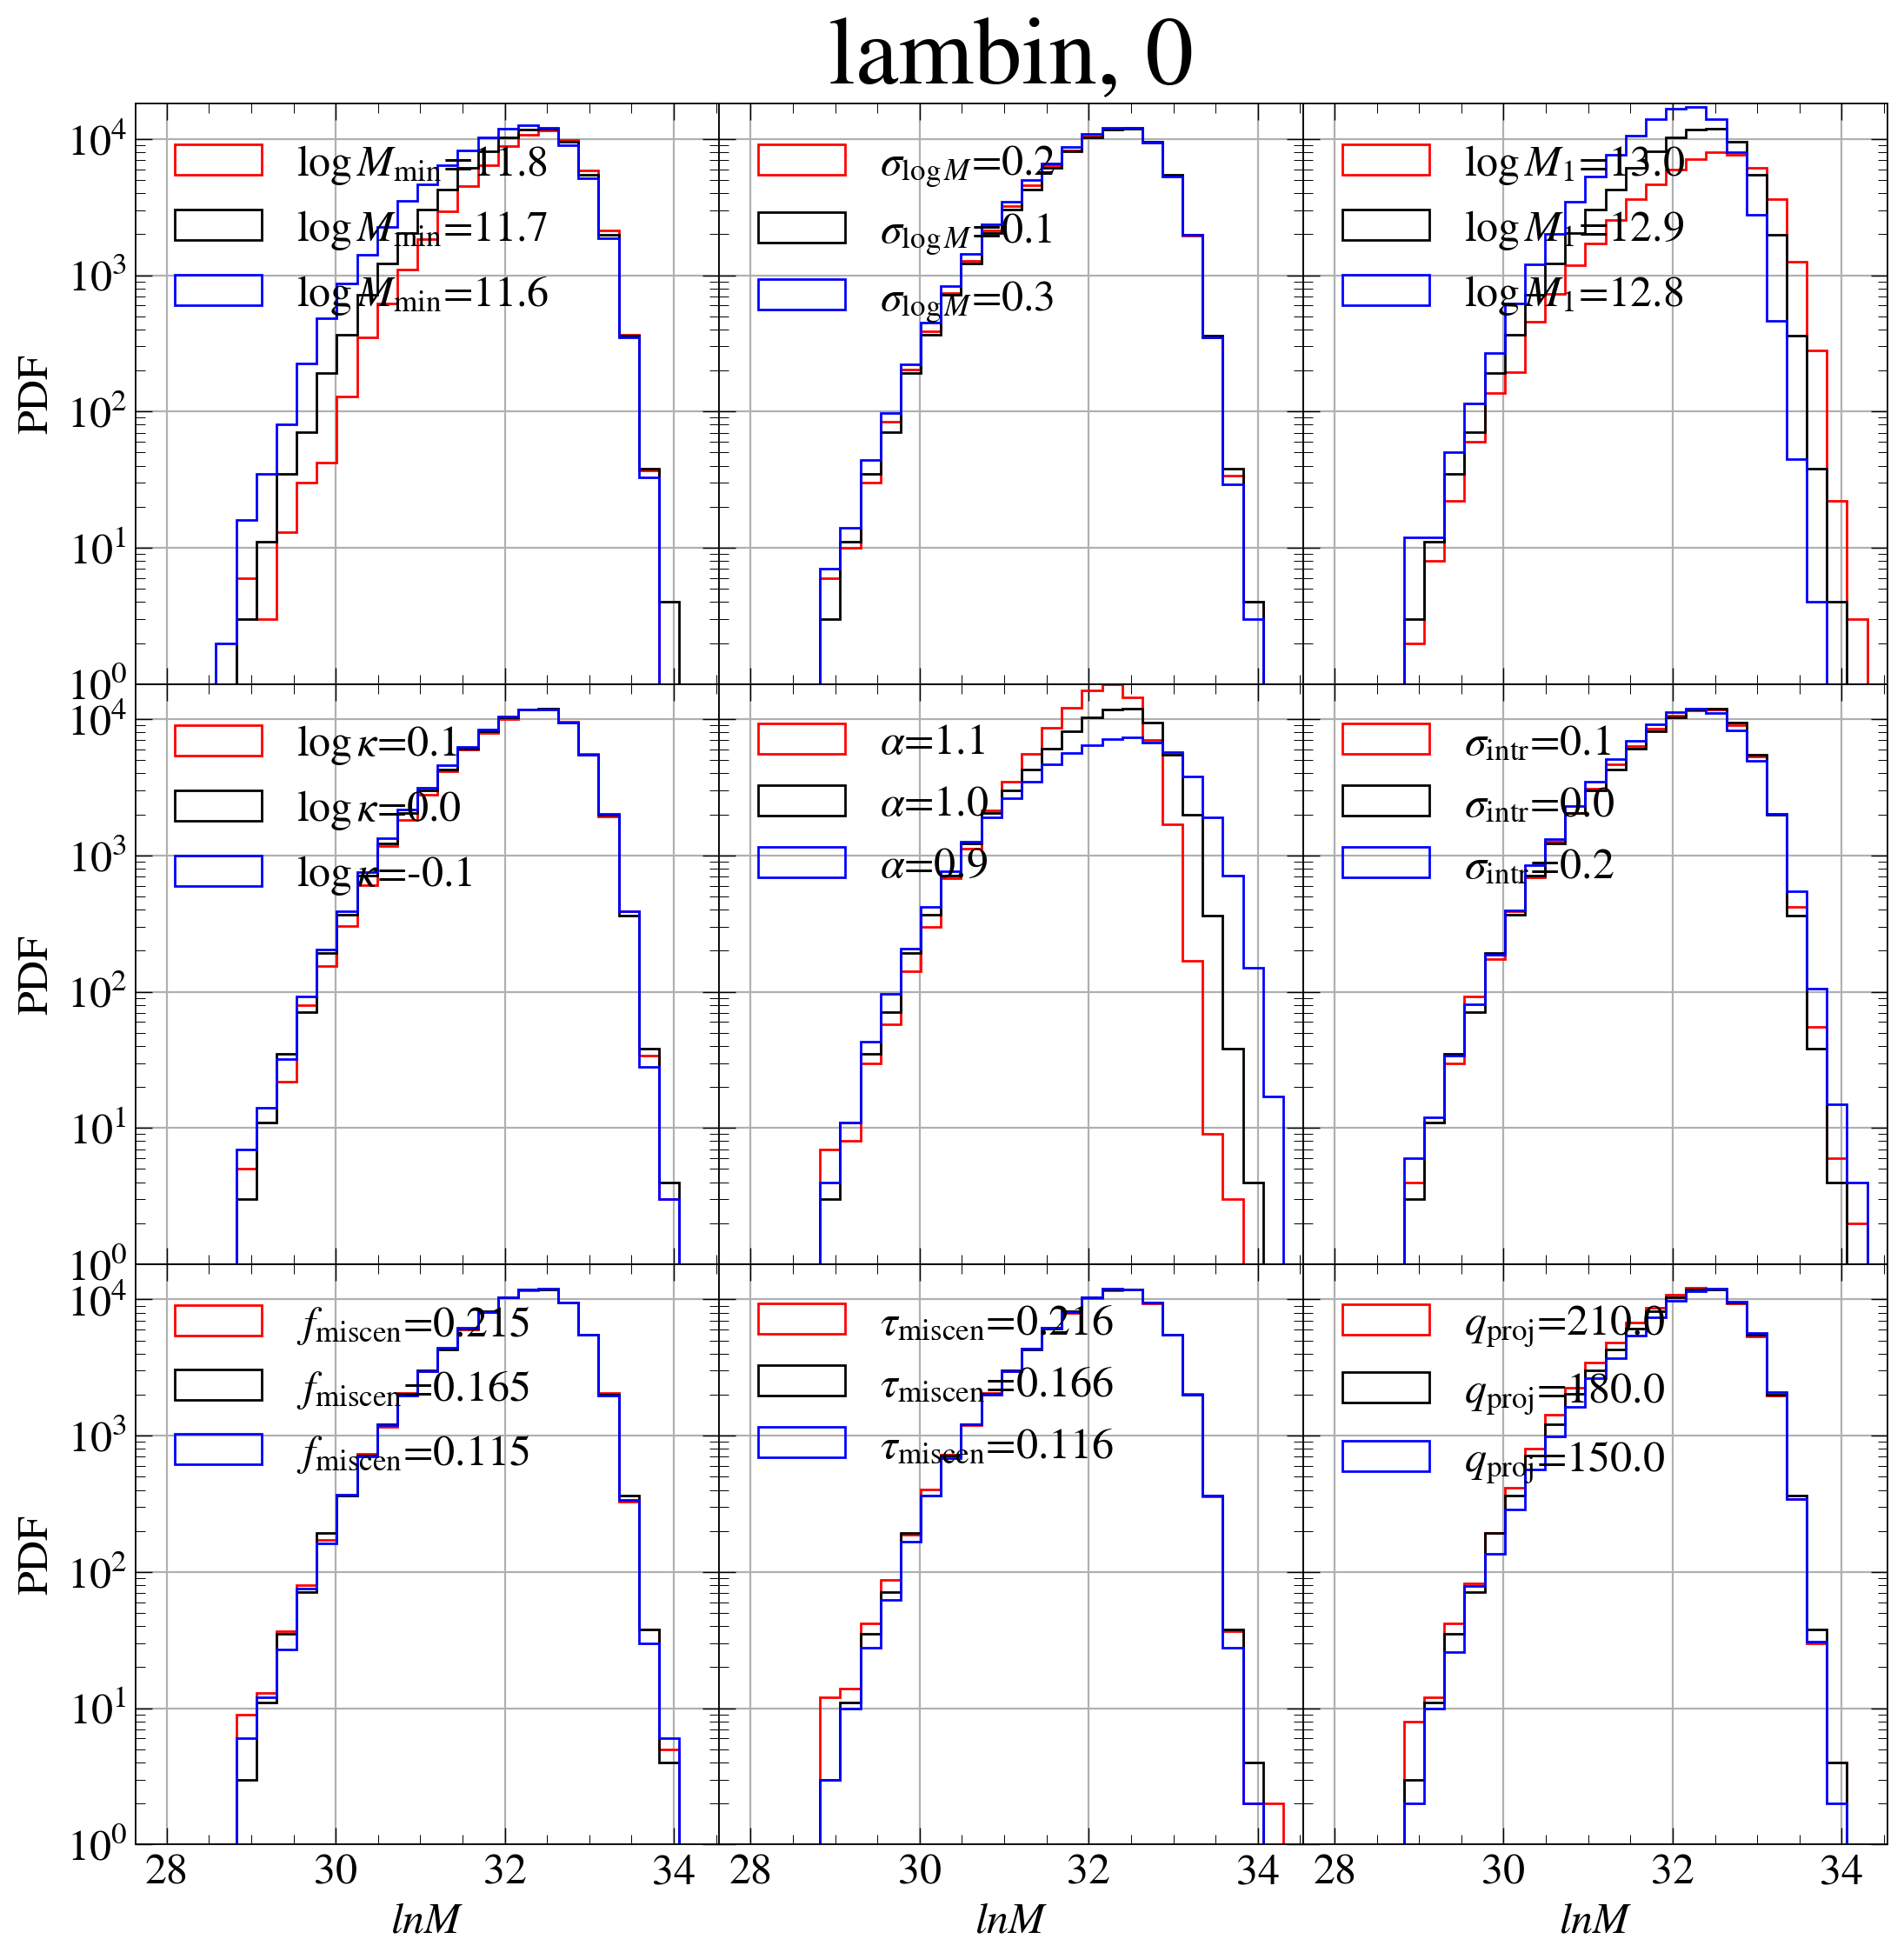

In [7]:
ibin = 0

Mbins = np.linspace(12,15,30) * np.log(10)
for binning in ['lam']:#, 'abun2']:
    fig, axes = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(13, 13), gridspec_kw = {'wspace':0, 'hspace':0})

    # get the fiducial
    hod_id = 0
    data_loc = loc + f'base_c{cosmo_id:0>3d}_ph000/z0p300/model_hod{hod_id:0>6d}/obs_q180_bg_miscen_desy1/'
    fname = data_loc + f'mass_{binning}_bin_2.dat'
    lnM = np.loadtxt(fname)
    #plt.hist(lnM, bins=Mbins)
    
    for ipanel, ipara in enumerate(ipara_list):    
        plt.subplot(3,3,ipanel+1)
        for hod_id in [ipara*2+1, 0, ipara*2+2]:         
            hod_para = get_hod_para(hod_id)
            data_loc = loc + f'base_c{cosmo_id:0>3d}_ph000/z0p300/model_hod{hod_id:0>6d}/obs_q180_bg_miscen_desy1/'
            fname = data_loc + f'mass_{binning}_bin_{ibin}.dat'
            lnM = np.loadtxt(fname)
    
            if hod_id == 0:
                c='k'
            if hod_id == ipara*2+1:
                c='red'
            if hod_id == ipara*2+2:
                c='blue'
                
            if binning == 'lam':
                histtype='step'
            if binning == 'abun':
                histtype='stepfilled'
                
            key = key_list[ipara]
            key2 = key_list2[ipara]
            label = f'{key2}={hod_para[key]}'
            #plt.plot(np.arange(4), counts/counts_fid, c=c, label=label)
            plt.hist(lnM, bins=Mbins, fc='none', ec=c, histtype=histtype, label=label)
            
            plt.legend(loc=2, frameon=False)
    
            if ipanel > 5:
                plt.xlabel(r'$lnM$')
            if ipanel % 3 == 0:
                plt.ylabel(r'PDF')
            # plt.ylim(0.5, 1.5)
            # plt.xlim(-0.1, 3.1)
            plt.yscale('log')

            if ipanel == 1:
                plt.title(binning+f'bin, {ibin}', fontsize=40)
                
#plt.savefig('../../plots/for_paper/sensitivities_mass_PDF_hod.pdf')
 
